In [58]:
#importing libraries

import pandas as pd
import datetime
import copy as cp
import numpy as np
import matplotlib.pyplot as plt

In [59]:
dataDir='D:/MEU/Universidade/Codigo Tese/Dados/'
BridgeOrganizedData=pd.read_csv(dataDir+'NonSegmentedData.csv') #Ver Jupyter Notebook: "Load+PreProcess JSON files" para
#encontrar o código que gerou o ficheiro 'NonSegmentedData.csv'
BridgeOrganizedData.drop(columns=['Unnamed: 0'],inplace=True)
BridgeOrganizedData['timestamp']= pd.to_datetime(BridgeOrganizedData['timestamp']) 

In [60]:
BridgeOrganizedData

,_id,timestamp,terminalSerialNumber,scaleSerialNumber,scaleGross,scaleNet,cellSerialNumber_0,cellWeight_0,cellSerialNumber_1,cellWeight_1,...,cellWeight_3,cellSerialNumber_4,cellWeight_4,cellSerialNumber_5,cellWeight_5,cellSerialNumber_6,cellWeight_6,cellSerialNumber_7,cellWeight_7,Unix_Timestamp
0,5cd43963a61883ad63c5835e,2019-05-09 14:22:55,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,1.557412e+09
1,5cd43965a618830094c58367,2019-05-09 14:22:58,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,1.557412e+09
2,5cd43968a61883e53ac58370,2019-05-09 14:23:01,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,1.557412e+09
3,5cd4396ba618835713c58379,2019-05-09 14:23:04,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,1.557412e+09
4,5cd43b33a61883db28c58384,2019-05-09 14:30:40,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,1.557412e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658134,605ddf2c990a4200087c0287,2021-03-26 14:13:19,160690,P191021852,630.0,630.0,7450332,-10.0,7450333,10.0,...,-10.0,7450338,0.0,7450337,0.0,7450336,10.0,7450341,-10.0,1.616768e+09
658135,605ddf2e990a4200087c0294,2021-03-26 14:13:21,160690,P191021852,690.0,690.0,7450332,-10.0,7450333,10.0,...,-10.0,7450338,10.0,7450337,60.0,7450336,-60.0,7450341,660.0,1.616768e+09
658136,605ddf31990a4200087c029b,2021-03-26 14:13:23,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,1.616768e+09
658137,605ddf32990a4200087c02a4,2021-03-26 14:13:25,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,1.616768e+09


In [61]:
SegmentedData=cp.deepcopy(BridgeOrganizedData)

### Criteria for Weighing Segmentation:

#### 1. Each weighing should start at 0 (+-X, with X=100 probably) and finish at 0 (+-X). Every consecutive measurement more than 30s apart from another must belong to a different weighing.
#### 2. Each weighing should weigh more than 200 kg
#### 3. Each weighing should have more than 5 points
#### 4. Each weighing should last more than 30s

### ---------------------------------------------------------------------------------------------------

#### Applying Criteria 1 - Each weighing should start at 0 (+-X, with X=100 probably) and finish at 0 (+-X). Every consecutive measurement more than 30s apart from another must belong to a different weighing.

In [62]:
#1. Calculate the time difference between consecutive measurements
#2. Every measurement that
#2. Separate into weighings the measurements that are more than 30s apart

#The Criteria will be applied as follows:
#1. The first measurement will be assigned to the first weighing

#2. Then the following measurements will also be assigned to the same weighing until one of the measurements 
#exceeds the established threshold -> (>X, higher than X)

#3. After exceeding the threshold, the following measurements will be assigned to the same weighing until, 
# at least 3 consecutive measurement cross the threshold -> (<X, smaller than X)

#4. After the 3rd step, a new weighing starts for the next measurement.

#5. Repeat steps 2, 3 and 4 until there are no more measurements to attribute to weighings.

In [63]:
"""timediff=30 #s
timediff=pd.Timedelta(timediff, unit='s')

SegmentedData['diff']=SegmentedData['timestamp'].diff()

weighcounter=0
key='weighing'
d_weighings={key:[weighcounter]}

for diff in SegmentedData['diff'][1:]:
    
    if diff>timediff:
        weighcounter=weighcounter+1
    d_weighings[key].append(weighcounter)
    
SegmentedData[key]=d_weighings[key]"""

"timediff=30 #s\ntimediff=pd.Timedelta(timediff, unit='s')\n\nSegmentedData['diff']=SegmentedData['timestamp'].diff()\n\nweighcounter=0\nkey='weighing'\nd_weighings={key:[weighcounter]}\n\nfor diff in SegmentedData['diff'][1:]:\n    \n    if diff>timediff:\n        weighcounter=weighcounter+1\n    d_weighings[key].append(weighcounter)\n    \nSegmentedData[key]=d_weighings[key]"

In [64]:
timediff=30 #s Máximo número de segundos que podem existir entre duas measurments consecutivas
timediff=pd.Timedelta(timediff, unit='s')

SegmentedData['diff']=SegmentedData['timestamp'].diff() #Calcular a diferença de tempos entre measurements

threshold=100 #kg Threshold para indicar se a pesagem já começou o seu ciclo de carga
weighcounter=0 #Contador que indica o número da pesagem
key='weighing'
d_weighings={key:[]} #dicionário que contém a indicação do número da pesagem para cada measurement

upperflag=False #Variável que indica se a pesagem já começou o seu ciclo de carga

bottomtolerance=3 #Numero de pontos que são permitidos entrar na pesagem antes de esta ter feito o ciclo de carga e esteja a 
#registar valores inferiores ao threshold de 100kg
bottomtolcounter=0 #Contagem do numero de pontos que foram permitidos entrar na pesagem anted de esta ter 
#feito o ciclo de carga e esteja a registar valores inferiores ao threshold de 100kg
uppertolerance=3 #Numero de pontos que são permitidos entrar na pesagem depois de esta ter feito o ciclo de descarga e esteja a 
#registar valores inferiores ao threshold de 100kg
uppertolcounter=0 #Contagem do numero de pontos que foram permitidos entrar na pesagem depois de esta ter 
#feito o ciclo de descarga e esteja a registar valores inferiores ao threshold de 100kg

close_weighing=False #Variável que indica que a pesagem corrente já se encontra em condições de poder ser fechada
just_closed=False #Variável que indica que a pesagem anterior já foi considerada fechada

for measurement in range(len(SegmentedData)):
    weight=SegmentedData['scaleGross'].iloc[measurement]
    
    diff=SegmentedData['diff'].iloc[measurement]
    
    if measurement!=0:
        if just_closed==False:
            if diff>timediff:
                if close_weighing==False:
                    for weigh_measure_index in range(len(d_weighings[key])):
                        weighing=d_weighings[key][weigh_measure_index]
                        if weighing==weighcounter:
                            d_weighings[key][weigh_measure_index]=np.nan
                else:
                    weighcounter=weighcounter+1
                    close_weighing=False
                
                upperflag=False
                uppertolcounter=0
        else:
            just_closed=False
            
    d_weighings[key].append(weighcounter)
    
    if upperflag==False:
        if weight>=threshold:
            upperflag=True
        bottomtolcounter=bottomtolcounter+1
        if bottomtolcounter==bottomtolerance+1:
            d_weighings[key][-bottomtolcounter]=np.nan
            bottomtolcounter=bottomtolcounter-1
    else:
        bottomtolcounter=0
        if weight<=threshold:
            close_weighing=True
        
            uppertolcounter=uppertolcounter+1
            if (uppertolcounter==uppertolerance): #or (weight<50) :
                uppertolcounter=0
                weighcounter=weighcounter+1
                upperflag=False
                just_closed=True
                close_weighing=False
        else:
            uppertolcounter=0

SegmentedData[key]=d_weighings[key]

In [65]:
FirstCriteria_df=cp.deepcopy(SegmentedData)

In [66]:
SegmentedData[['diff','scaleGross','weighing']].head(50)

,diff,scaleGross,weighing
0,NaT,0.0,NaN
1,00:00:03,0.0,NaN
2,00:00:03,0.0,NaN
3,00:00:03,0.0,NaN
4,00:07:36,0.0,NaN
5,00:00:03,0.0,NaN
6,00:00:03,0.0,NaN
7,00:00:03,0.0,NaN
8,00:00:03,80.0,NaN
9,00:00:03,70.0,NaN


In [67]:
SegmentedData['weighing'][SegmentedData['weighing'].notnull()]

37           0.0
38           0.0
39           0.0
40           0.0
41           0.0
           ...  
658134    8574.0
658135    8574.0
658136    8574.0
658137    8574.0
658138    8574.0
Name: weighing, Length: 325998, dtype: float64

In [68]:
len(SegmentedData['weighing'][SegmentedData['weighing'].notnull()].unique())

8575

In [69]:
"""threshold=100 #kg
weighcounter=0
key='weighing'
d_weighings={key:[]}

upperflag=False

tolerance=3

tolcounter=0

for measurement in SegmentedData['scaleGross']:
    d_weighings[key].append(weighcounter)
    
    if upperflag==False:
        if measurement>=threshold:
            upperflag=True
    else:
        if measurement<=threshold:
            tolcounter=tolcounter+1
            if tolcounter==tolerance:
                tolcounter=0
                weighcounter=weighcounter+1
                upperflag=False
        else:
            tolcounter=0

SegmentedData[key]=d_weighings[key]"""

"threshold=100 #kg\nweighcounter=0\nkey='weighing'\nd_weighings={key:[]}\n\nupperflag=False\n\ntolerance=3\n\ntolcounter=0\n\nfor measurement in SegmentedData['scaleGross']:\n    d_weighings[key].append(weighcounter)\n    \n    if upperflag==False:\n        if measurement>=threshold:\n            upperflag=True\n    else:\n        if measurement<=threshold:\n            tolcounter=tolcounter+1\n            if tolcounter==tolerance:\n                tolcounter=0\n                weighcounter=weighcounter+1\n                upperflag=False\n        else:\n            tolcounter=0\n\nSegmentedData[key]=d_weighings[key]"

#### Applying Criteria 2 - Each weighing should weigh more than 200 kg

In [70]:
#1. Retrieve the maximum measurement of all weighings
#2. Turn to Nan the weighings whose maximum does not meet the criteria (200 kg)


In [71]:
len(SegmentedData['weighing'].unique())

8576

In [72]:
minweight=200 #kg

aux_bridge=cp.deepcopy(SegmentedData[SegmentedData['weighing'].notnull()])
c=0
for weighing in aux_bridge['weighing'].unique():
    maximum=SegmentedData['scaleGross'][SegmentedData['weighing']==weighing].max()
    if maximum<minweight:
        SegmentedData['weighing'][SegmentedData['weighing']==weighing]=np.NaN
    else:
        SegmentedData['weighing'][SegmentedData['weighing']==weighing]=c
        c=c+1

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
len(SegmentedData['weighing'].unique())

7475

#### Applying Criteria 4 - Each weighing should have more than 5 points

In [74]:
#1. Retrieve the total number of measurements for each weighings
#2. Turn to Nan the weighings whose total number of measurements does not meet the criteria (>=5 )

In [75]:
minmeasurements=5 #kg

c=0
aux_bridge=cp.deepcopy(SegmentedData[SegmentedData['weighing'].notnull()])
for weighing in aux_bridge['weighing'].unique():
    nmeasurements=len(SegmentedData[SegmentedData['weighing']==weighing])
    if nmeasurements<minmeasurements:
        SegmentedData['weighing'][SegmentedData['weighing']==weighing]=np.NaN
    else:
        SegmentedData['weighing'][SegmentedData['weighing']==weighing]=c
        c=c+1

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
len(SegmentedData['weighing'].unique())

7425

In [77]:
len(SegmentedData['weighing'][SegmentedData['weighing'].notnull()])

319219

In [78]:
#Verificação
teste=SegmentedData[['timestamp','weighing']].groupby(['weighing']).count()
teste[teste['timestamp']<5]

,timestamp
weighing,


#### Applying Criteria 5 - Each weighing should last more than 30s

In [79]:
#1. Retrieve the total period of each weighing
#2. Turn to Nan the weighings whose total period does not meet the criteria (>=30s)

In [80]:
mintime=30 #s
mintime=pd.Timedelta(mintime, unit='s')

c=0
aux_bridge=cp.deepcopy(SegmentedData[SegmentedData['weighing'].notnull()])
for weighing in aux_bridge['weighing'].unique():
    np_array=SegmentedData['timestamp'][SegmentedData['weighing']==weighing].values
    latest_time=np_array[-1]
    earliest_time=np_array[0]
    period=pd.Timedelta(latest_time-earliest_time)
    if period<mintime:
        SegmentedData['weighing'][SegmentedData['weighing']==weighing]=np.NaN
    else:
        SegmentedData['weighing'][SegmentedData['weighing']==weighing]=c
        c=c+1

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
len(SegmentedData['weighing'].unique())

2899

In [82]:
Nan_array=np.empty(len(SegmentedData))
Nan_array[:]=np.NaN
SegmentedData['maximumWeight']=cp.deepcopy(Nan_array)
SegmentedData['n_points']=cp.deepcopy(Nan_array)
SegmentedData['period']=cp.deepcopy(Nan_array)

aux_bridge=cp.deepcopy(SegmentedData[SegmentedData['weighing'].notnull()])
for weighing in aux_bridge['weighing'].unique():
    
    maximum=SegmentedData['scaleGross'][SegmentedData['weighing']==weighing].max()
    nmeasurements=len(SegmentedData[SegmentedData['weighing']==weighing])
    
    np_array=SegmentedData['timestamp'][SegmentedData['weighing']==weighing].values
    latest_time=np_array[-1]
    earliest_time=np_array[0]
    period=pd.Timedelta(latest_time-earliest_time)
    
    SegmentedData['maximumWeight'][SegmentedData['weighing']==weighing]=maximum
    SegmentedData['n_points'][SegmentedData['weighing']==weighing]=nmeasurements
    SegmentedData['period'][SegmentedData['weighing']==weighing]=period
    

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [83]:
SegmentedData[['weighing','diff','period','maximumWeight','n_points']]

,weighing,diff,period,maximumWeight,n_points
0,NaN,NaT,NaN,NaN,NaN
1,NaN,00:00:03,NaN,NaN,NaN
2,NaN,00:00:03,NaN,NaN,NaN
3,NaN,00:00:03,NaN,NaN,NaN
4,NaN,00:07:36,NaN,NaN,NaN
...,...,...,...,...,...
658134,NaN,00:00:02,NaN,NaN,NaN
658135,NaN,00:00:02,NaN,NaN,NaN
658136,NaN,00:00:02,NaN,NaN,NaN
658137,NaN,00:00:02,NaN,NaN,NaN


### Weighings are segmented! Saving file.

In [84]:
SegmentedData.to_csv(dataDir+'SegmentedDataV2.csv')

### As novas features: maximumWeight, n_points e period não estão a funcionar corretamente

In [85]:
SegmentedData[['weighing','maximumWeight','n_points','period']][SegmentedData['weighing'].notnull()]

,weighing,maximumWeight,n_points,period
139,0.0,30700.0,72.0,0 days 00:04:12
140,0.0,30700.0,72.0,0 days 00:04:12
141,0.0,30700.0,72.0,0 days 00:04:12
142,0.0,30700.0,72.0,0 days 00:04:12
143,0.0,30700.0,72.0,0 days 00:04:12
...,...,...,...,...
657901,2897.0,16200.0,75.0,0 days 00:02:28
657902,2897.0,16200.0,75.0,0 days 00:02:28
657903,2897.0,16200.0,75.0,0 days 00:02:28
657904,2897.0,16200.0,75.0,0 days 00:02:28


In [86]:
SegmentedData[['weighing','maximumWeight','n_points','period']][SegmentedData['weighing'].notnull()].dropna()

,weighing,maximumWeight,n_points,period
139,0.0,30700.0,72.0,0 days 00:04:12
140,0.0,30700.0,72.0,0 days 00:04:12
141,0.0,30700.0,72.0,0 days 00:04:12
142,0.0,30700.0,72.0,0 days 00:04:12
143,0.0,30700.0,72.0,0 days 00:04:12
...,...,...,...,...
657901,2897.0,16200.0,75.0,0 days 00:02:28
657902,2897.0,16200.0,75.0,0 days 00:02:28
657903,2897.0,16200.0,75.0,0 days 00:02:28
657904,2897.0,16200.0,75.0,0 days 00:02:28


In [87]:
def plot_weighing(df,weighing):
    a=['weighing','timestamp','cellWeight_0','cellWeight_1','cellWeight_2'
       ,'cellWeight_3','cellWeight_4','cellWeight_5','cellWeight_6','cellWeight_7']
    dados=df[a][df['weighing']==weighing]
    plt.figure(figsize=(20,10))
    plt.plot(dados.timestamp, dados[a[2:]].values)#, 'g')
    #plt.legend(['0','1','2','3','4','5','6','7'])
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Weight', fontsize=18)
    plt.title('Weighing '+str(weighing), fontsize=26)
    return None

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


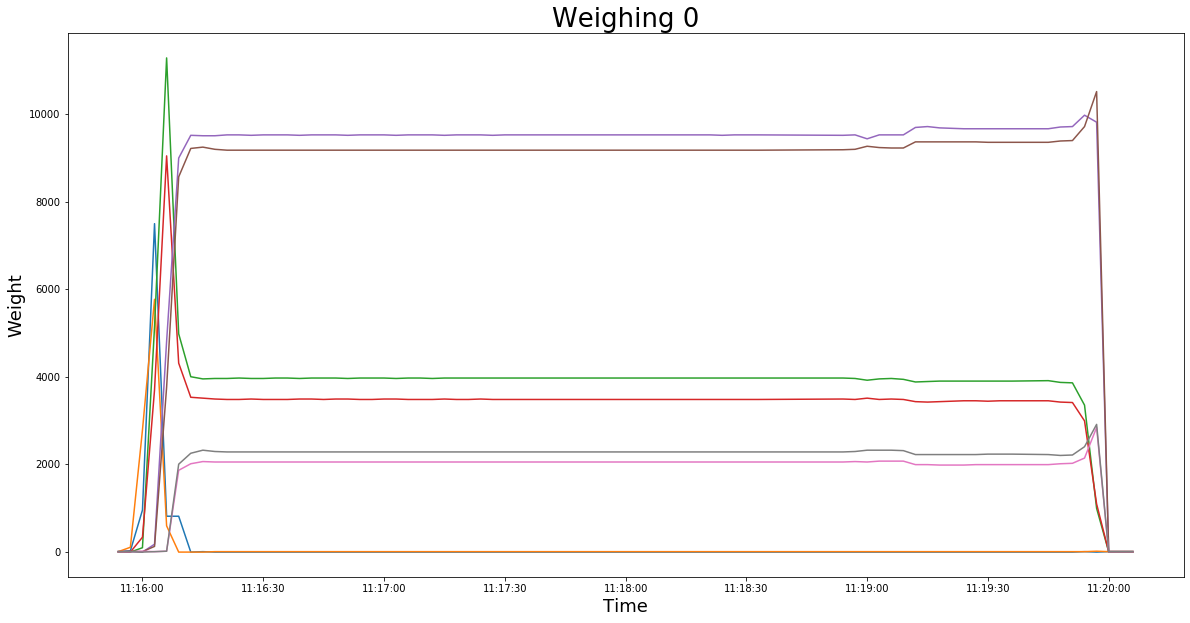

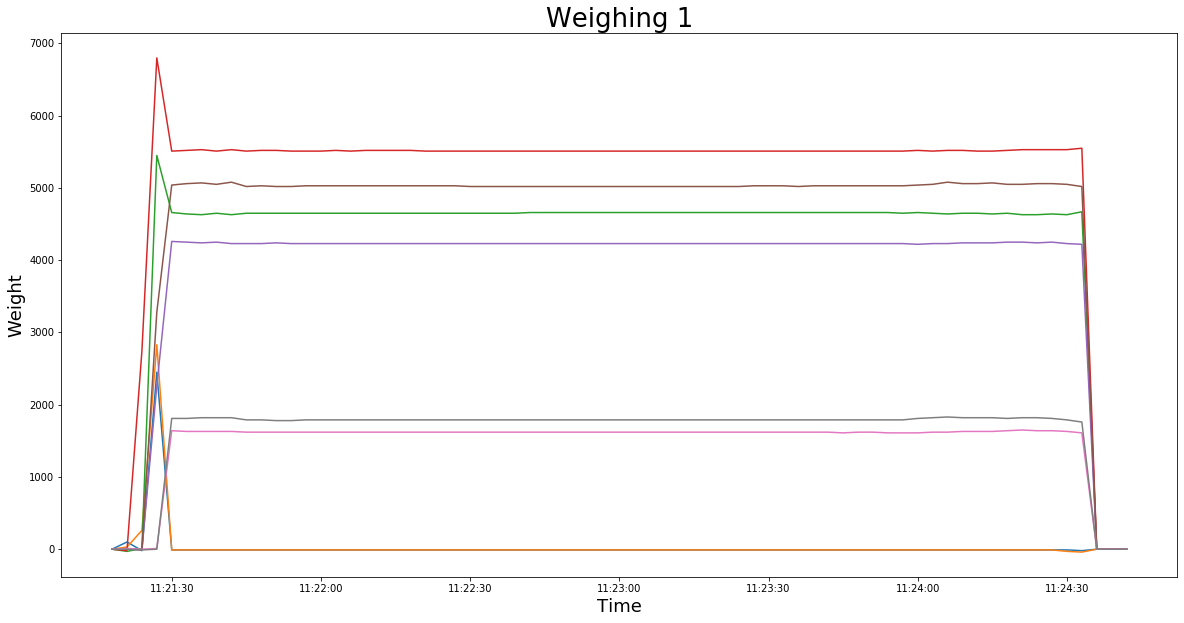

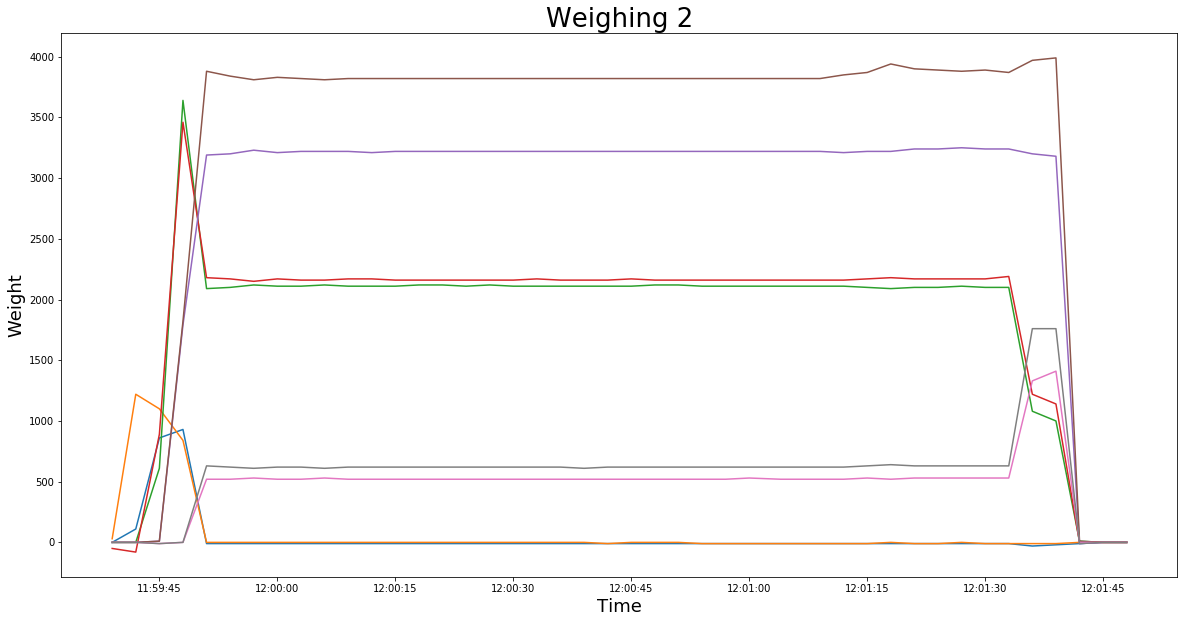

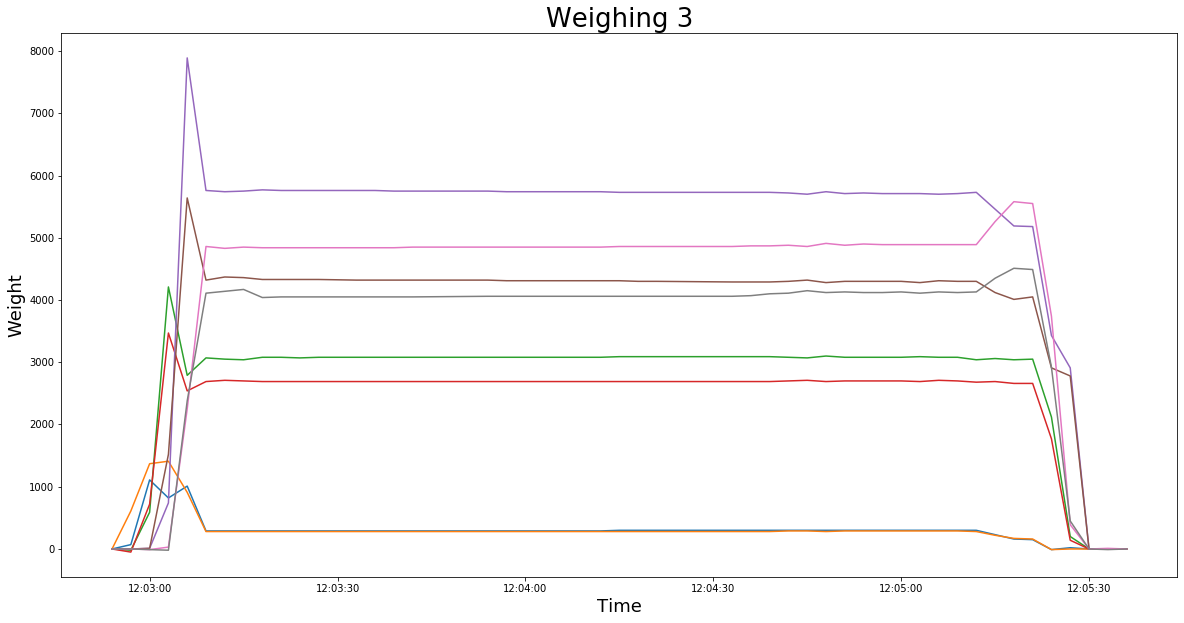

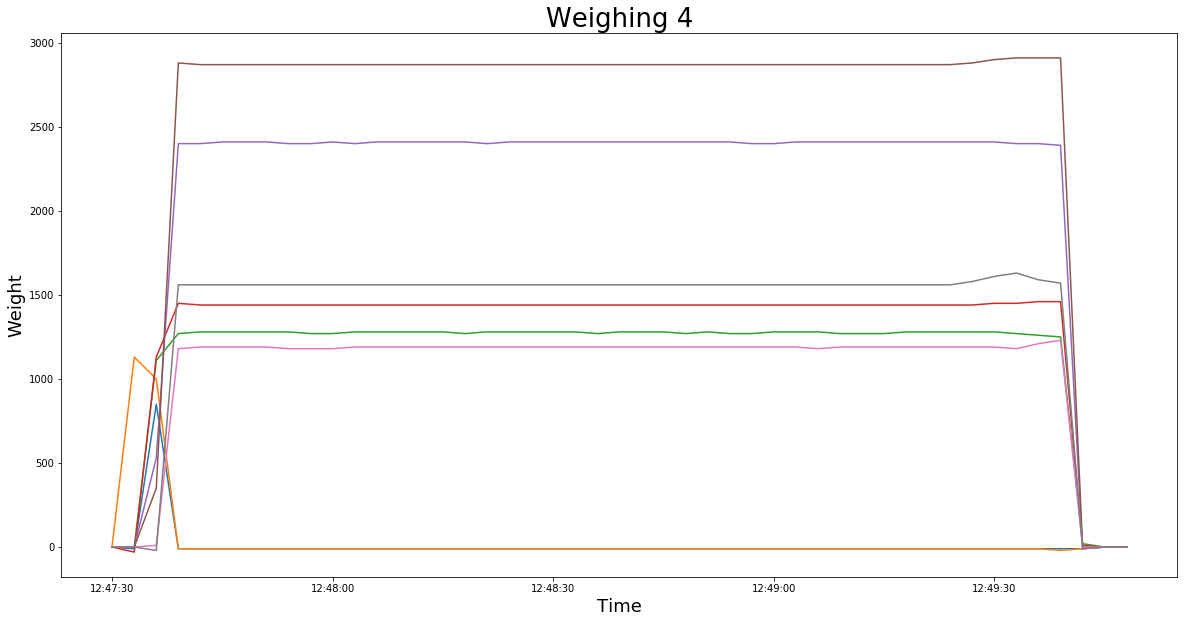

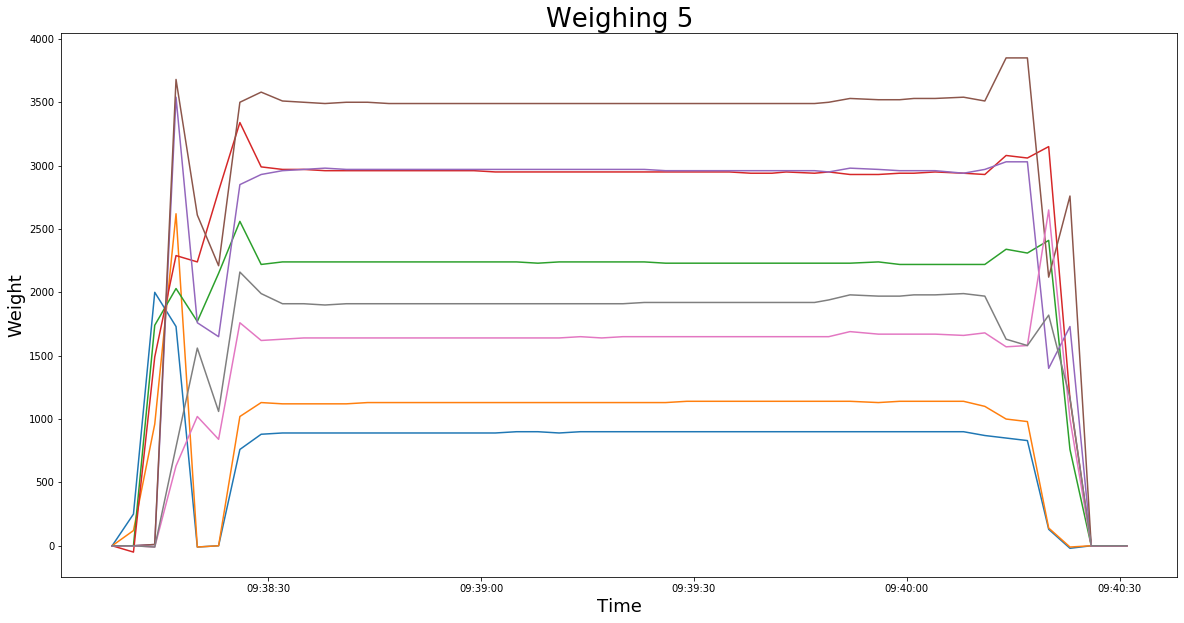

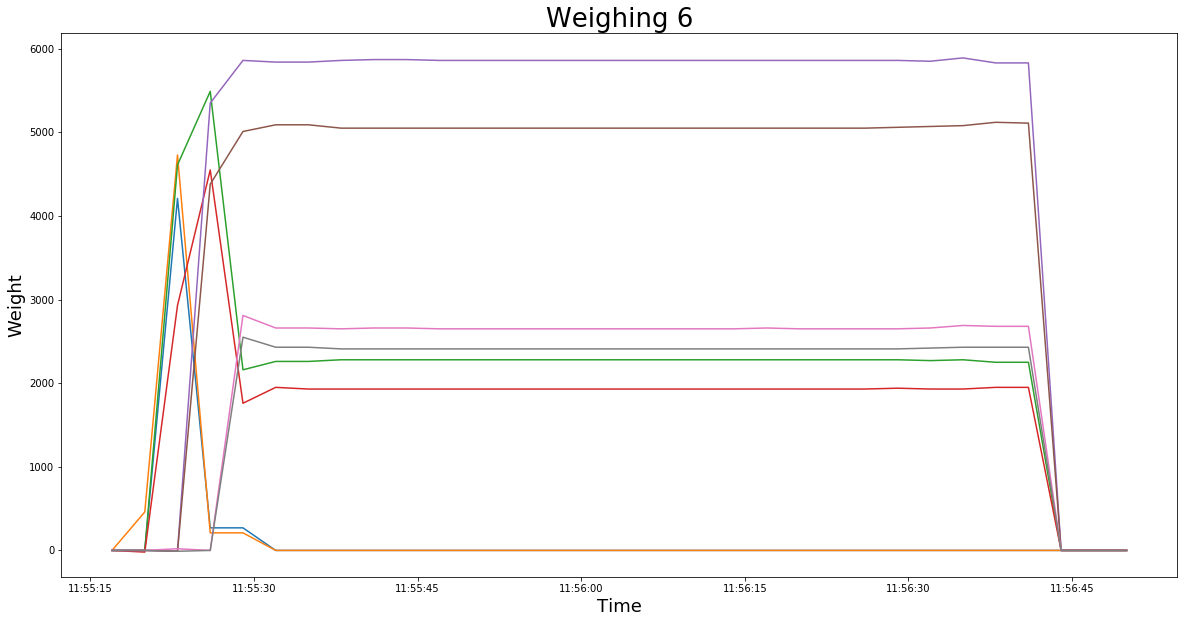

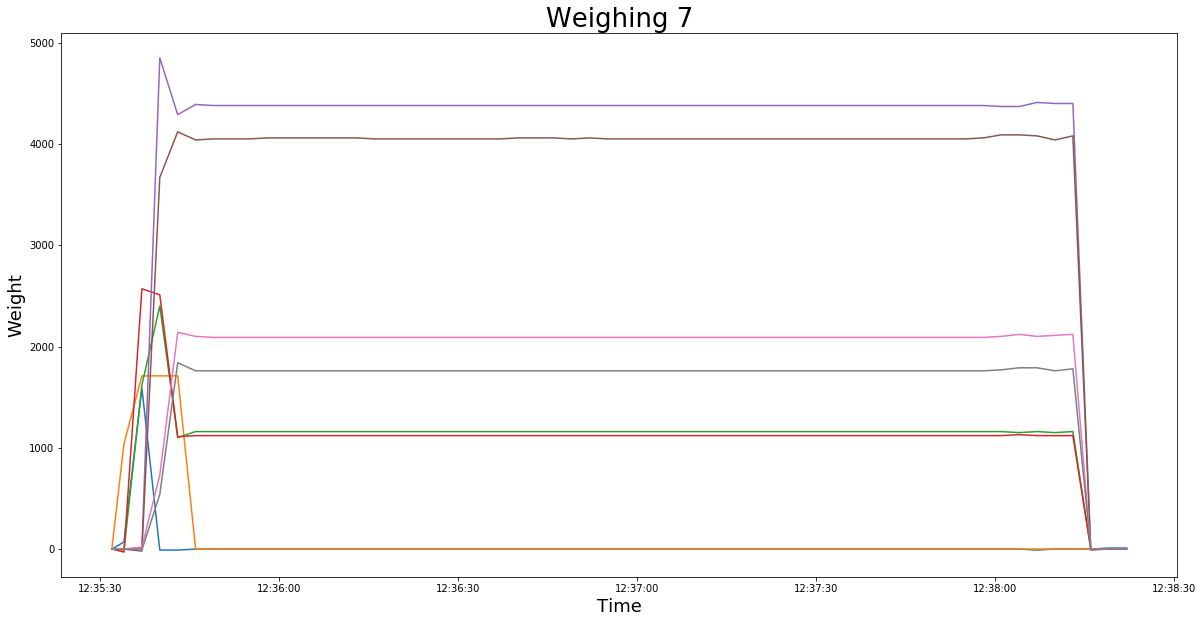

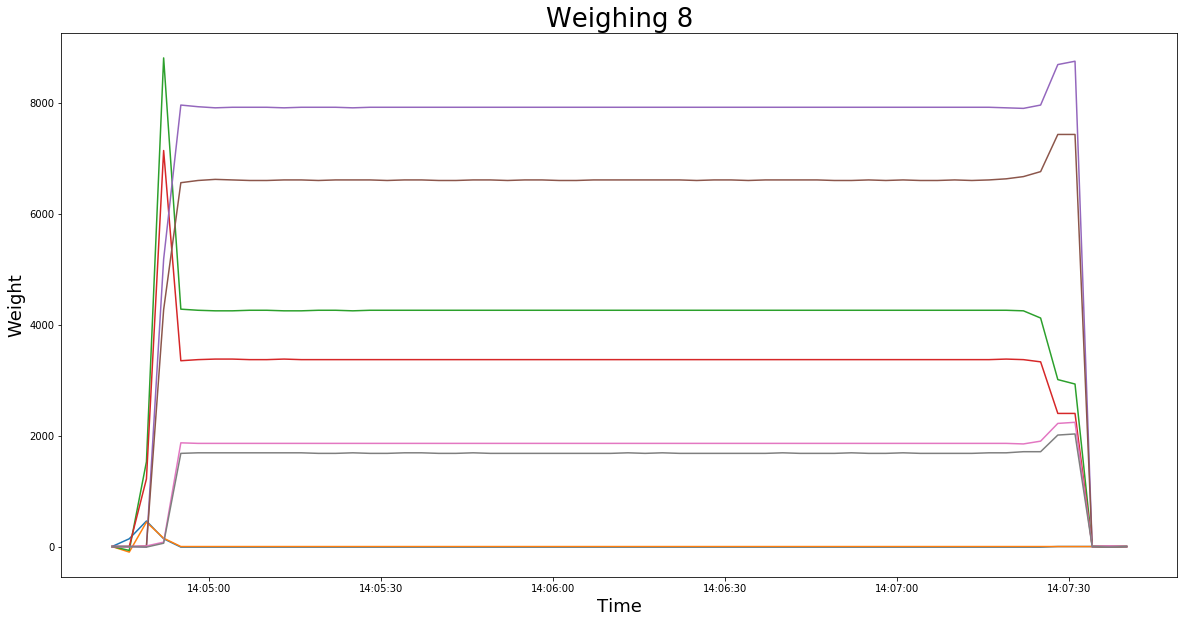

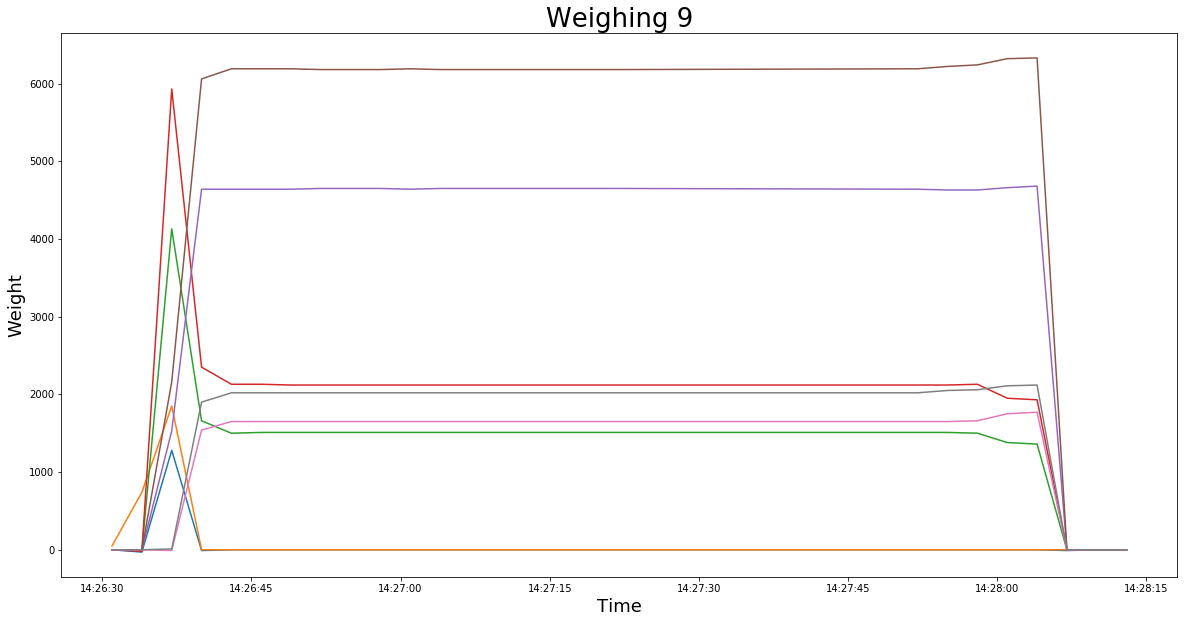

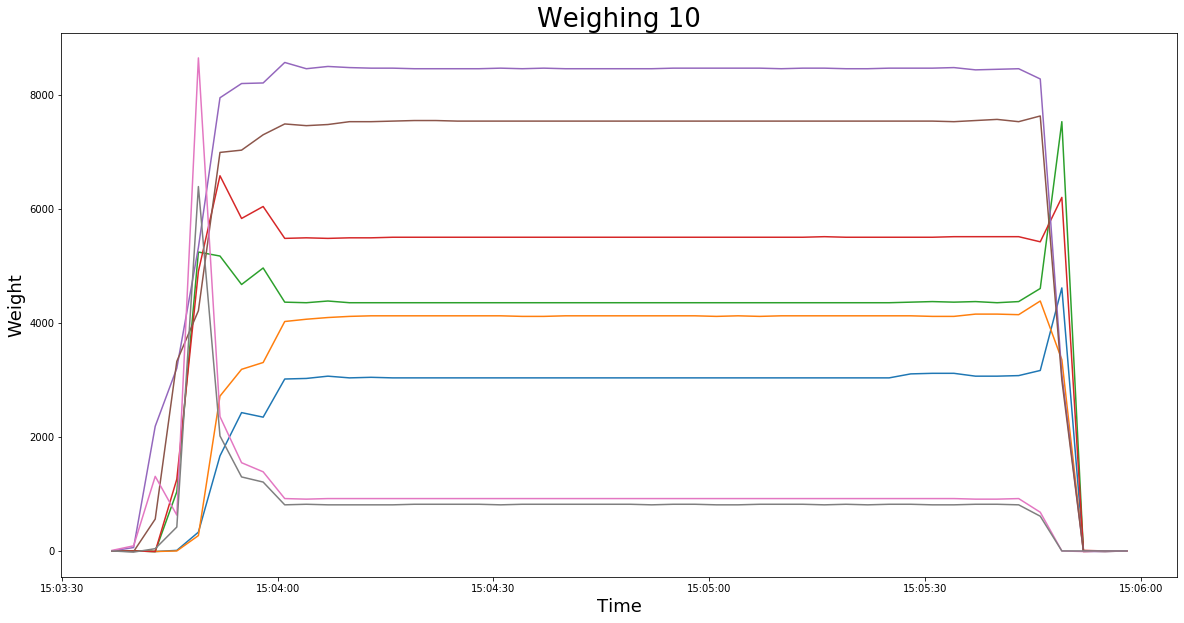

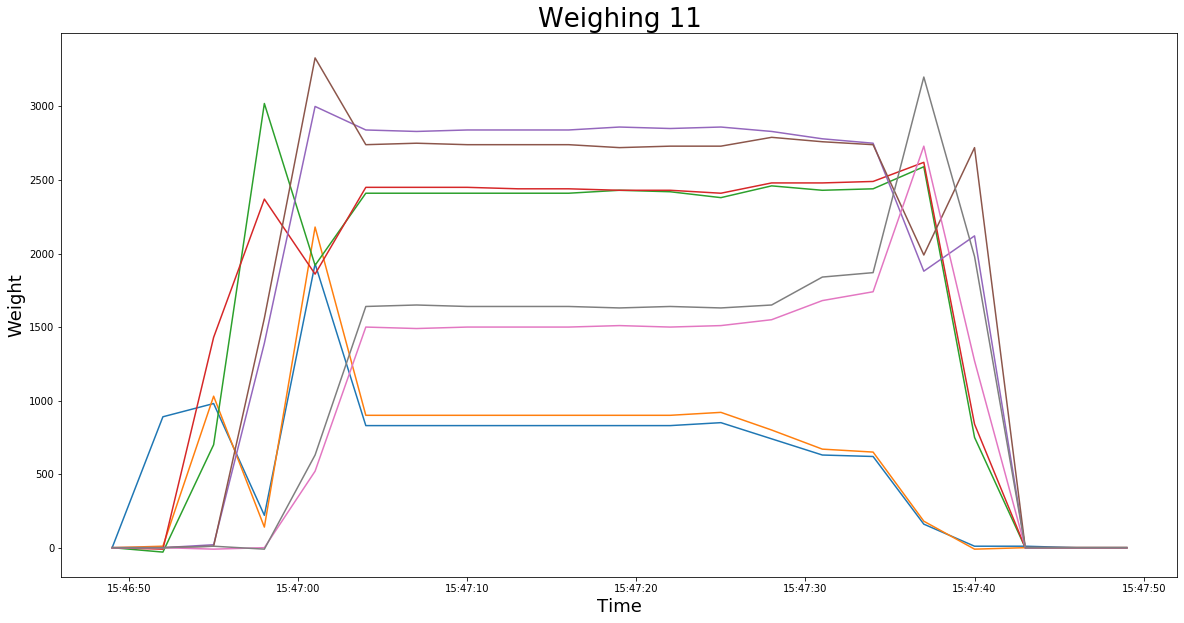

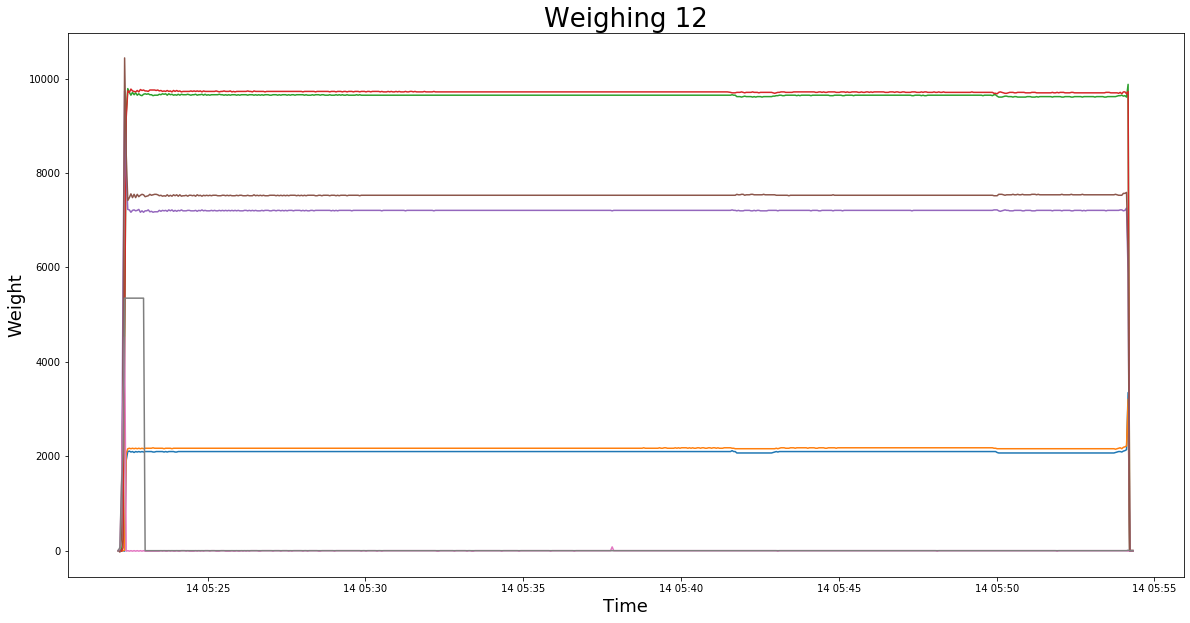

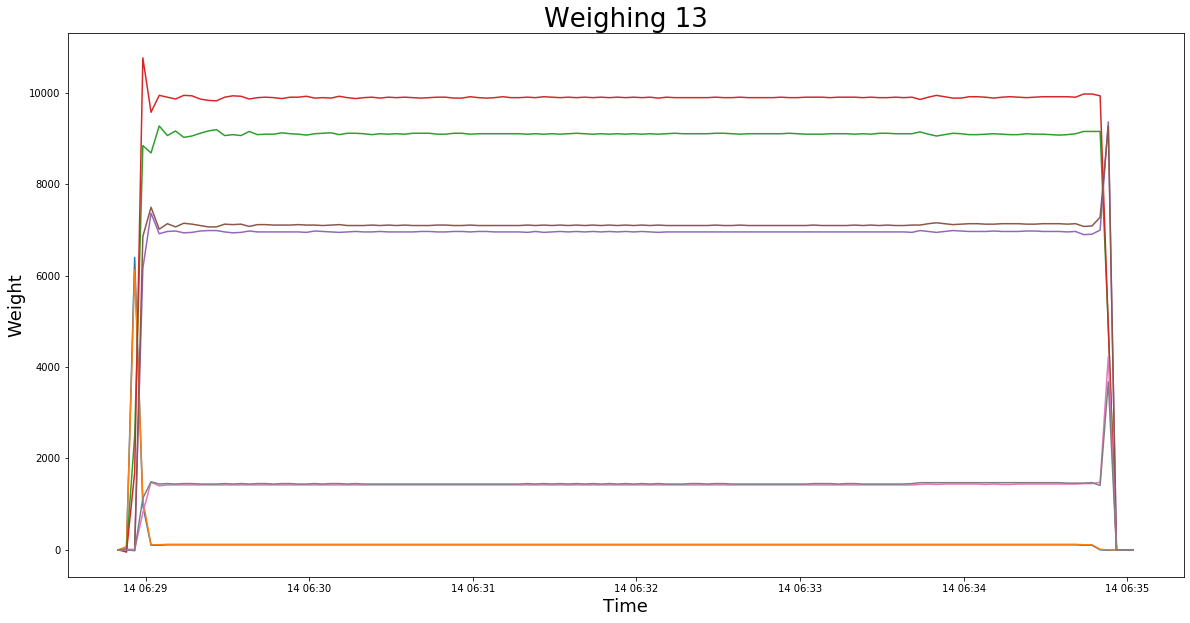

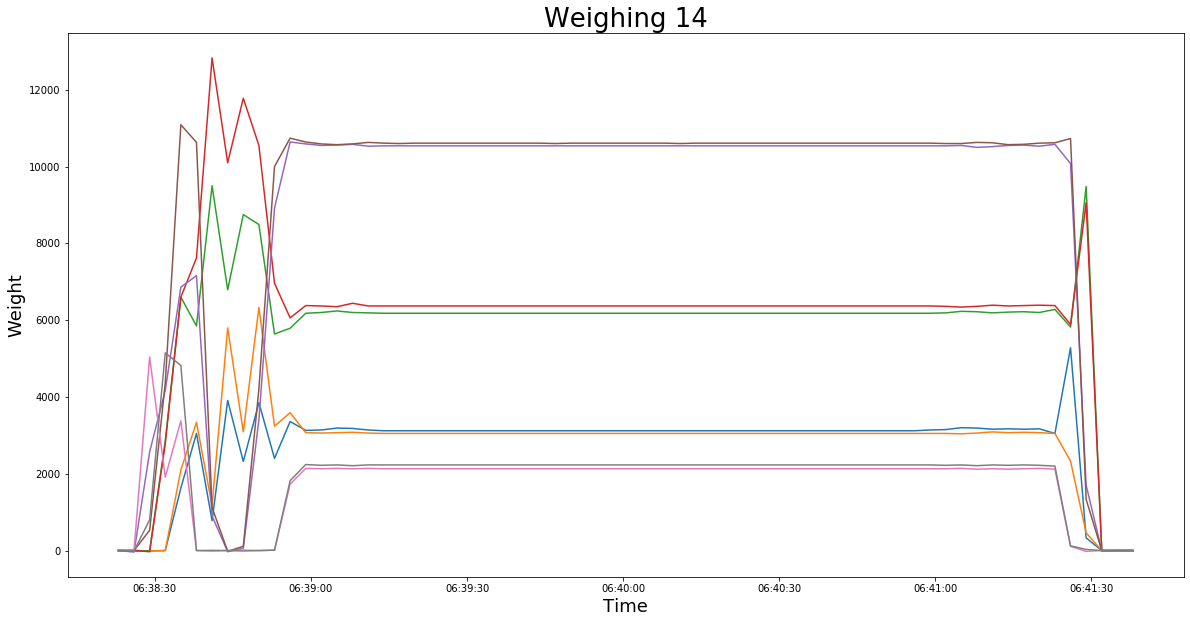

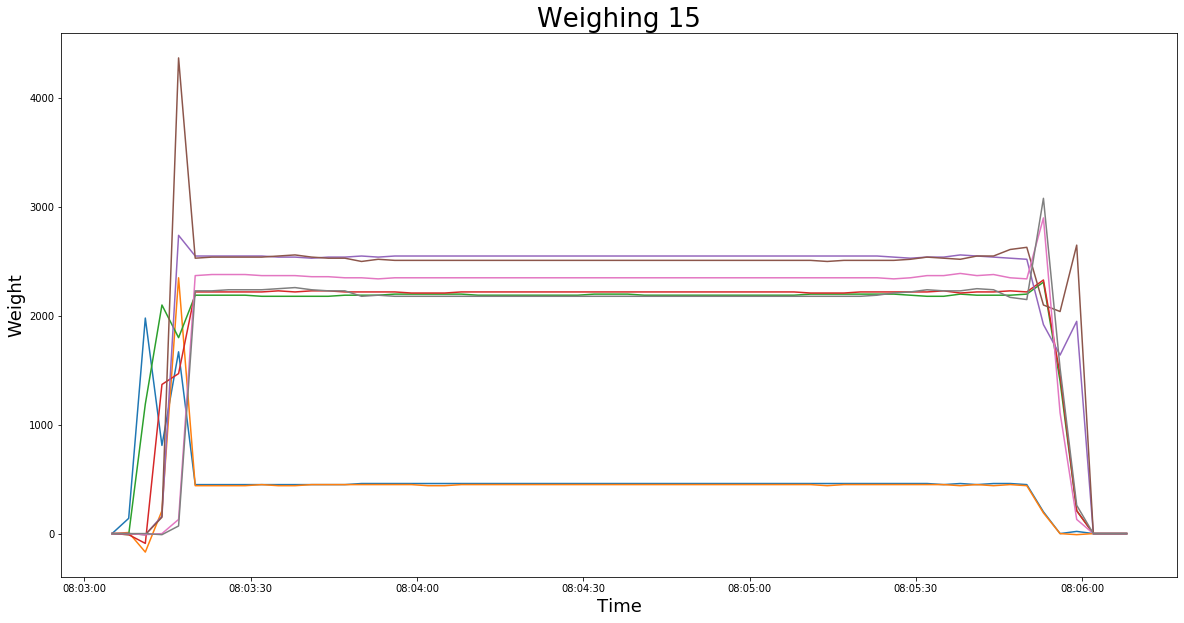

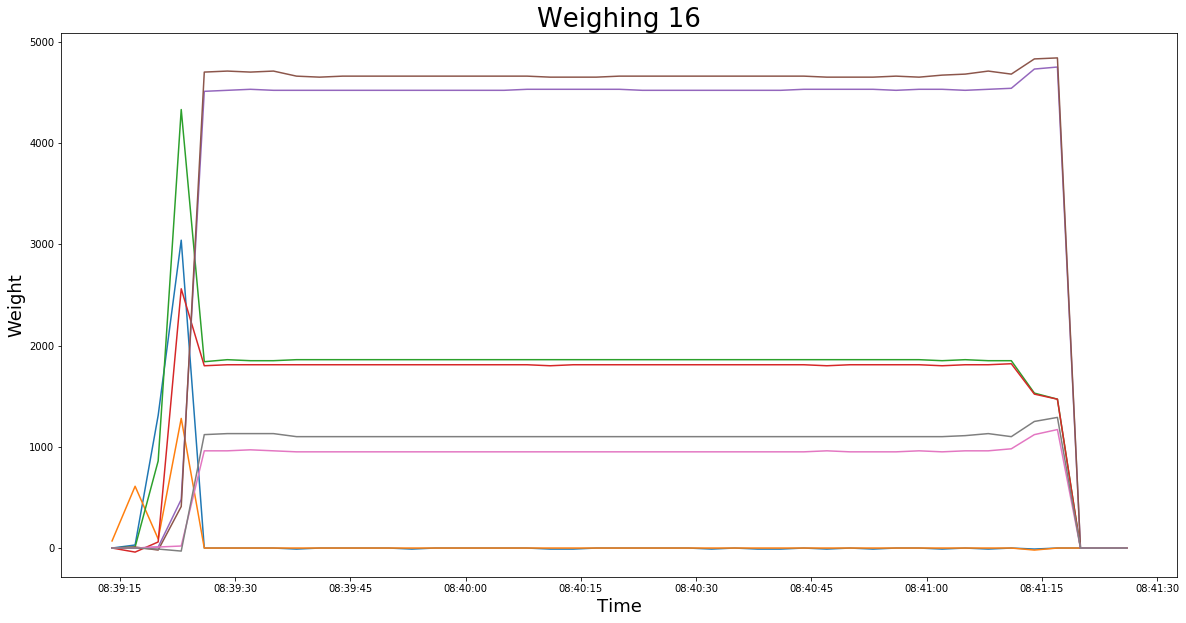

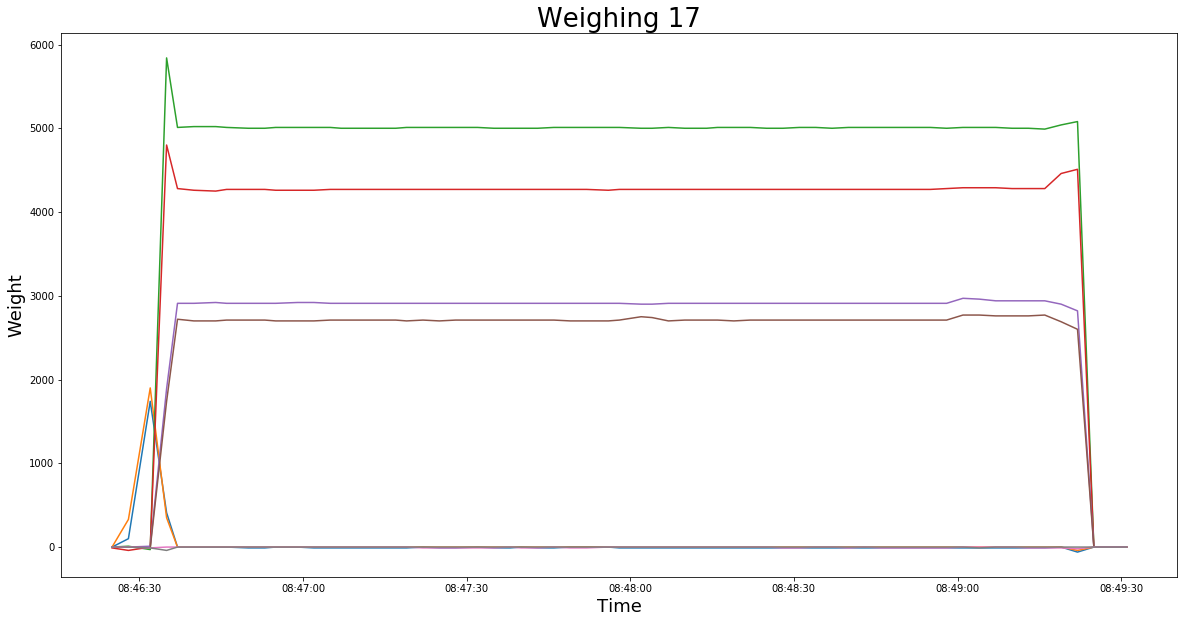

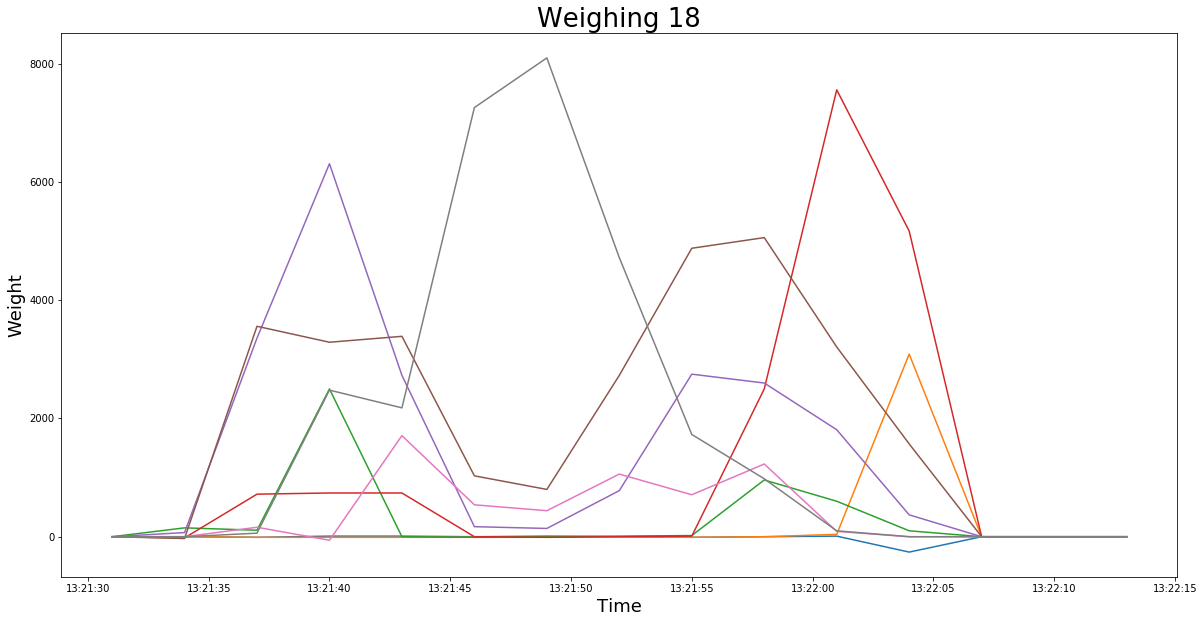

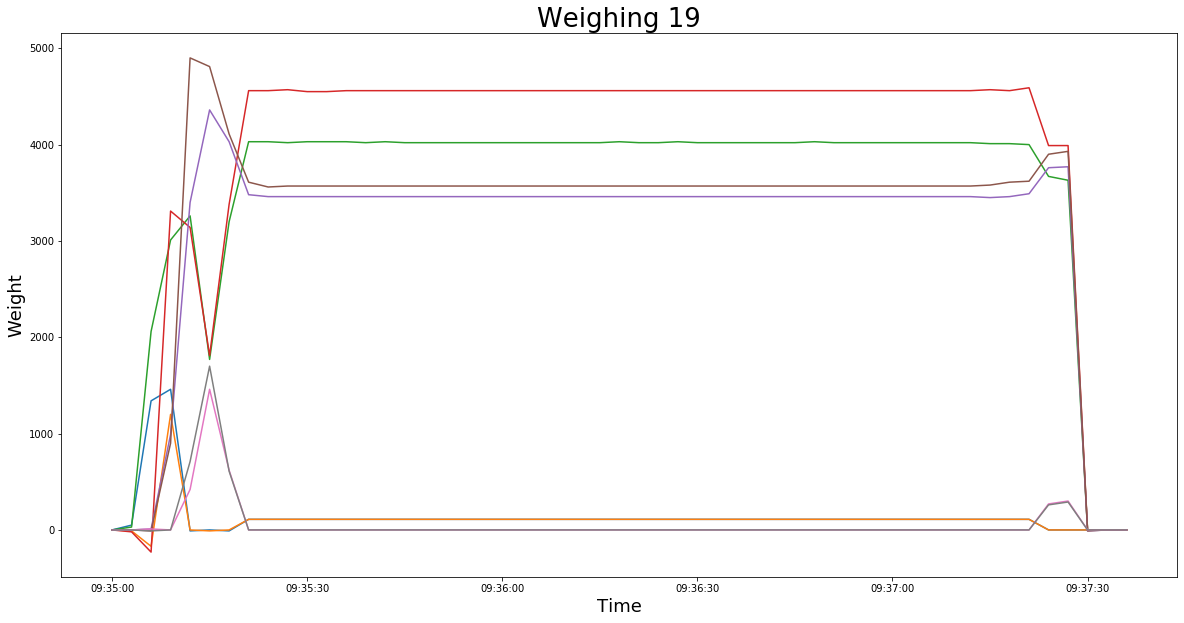

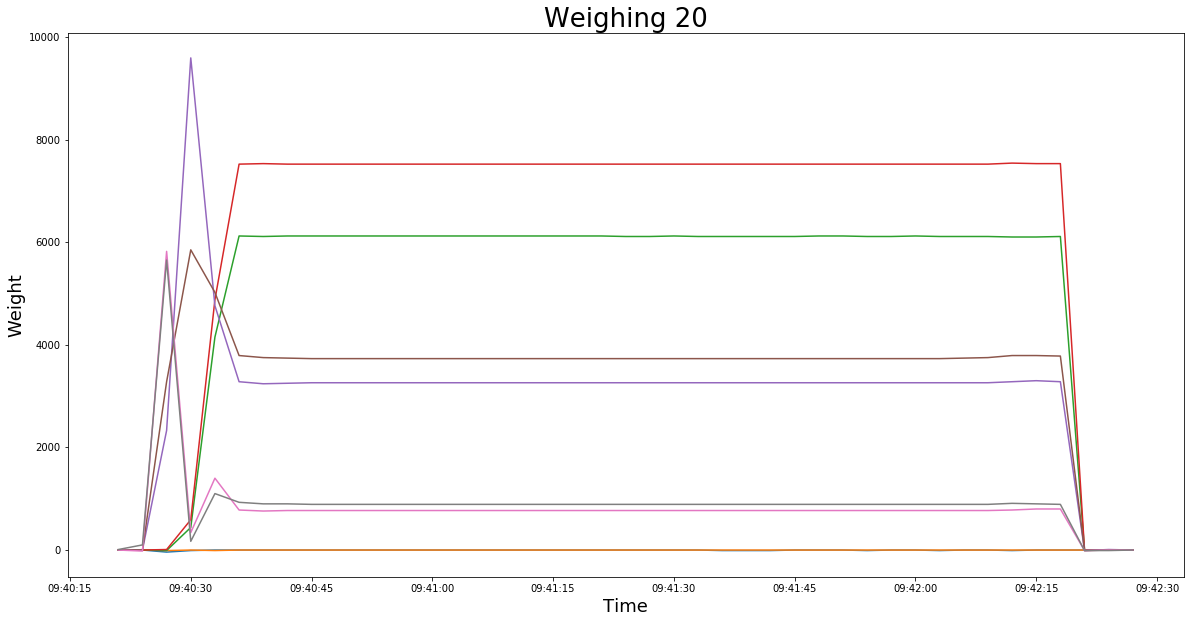

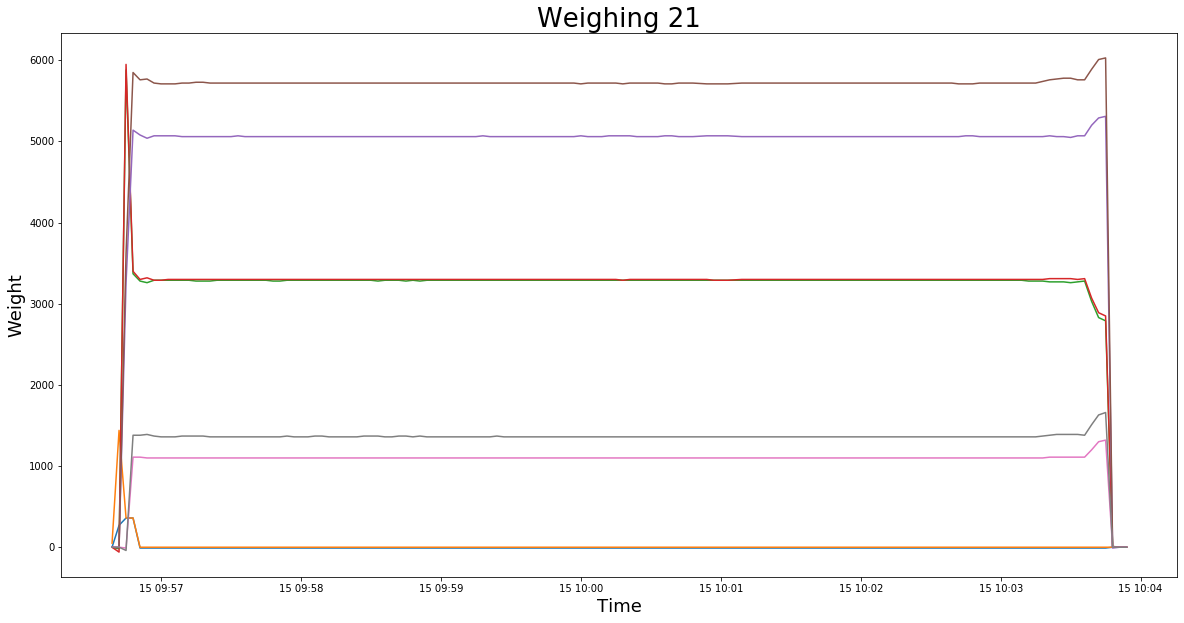

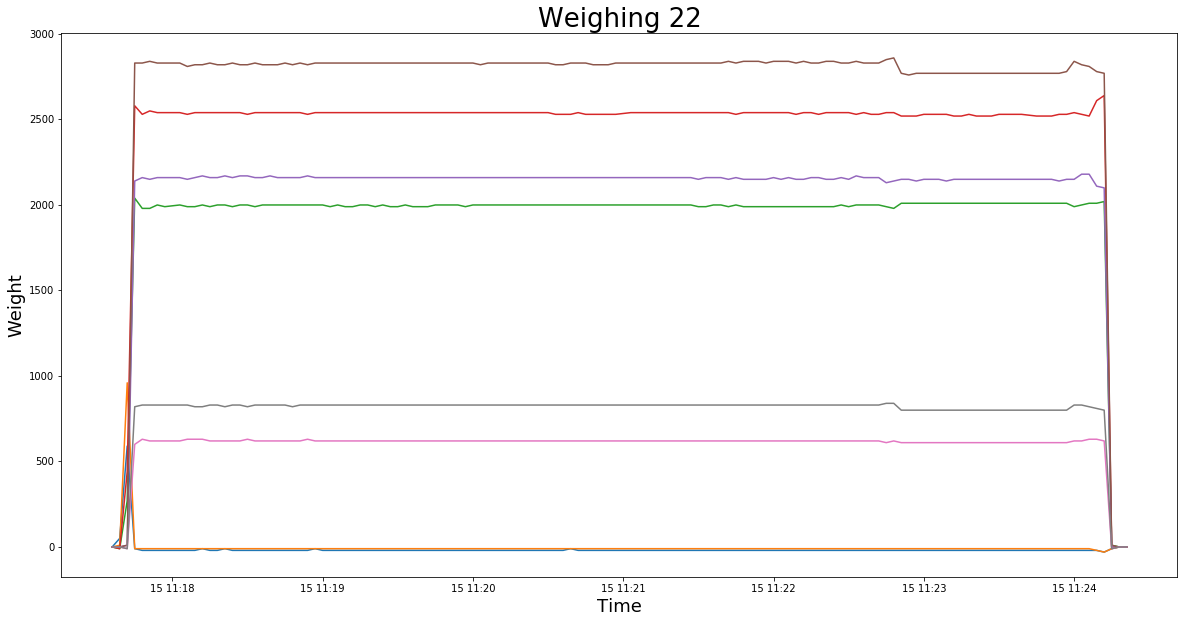

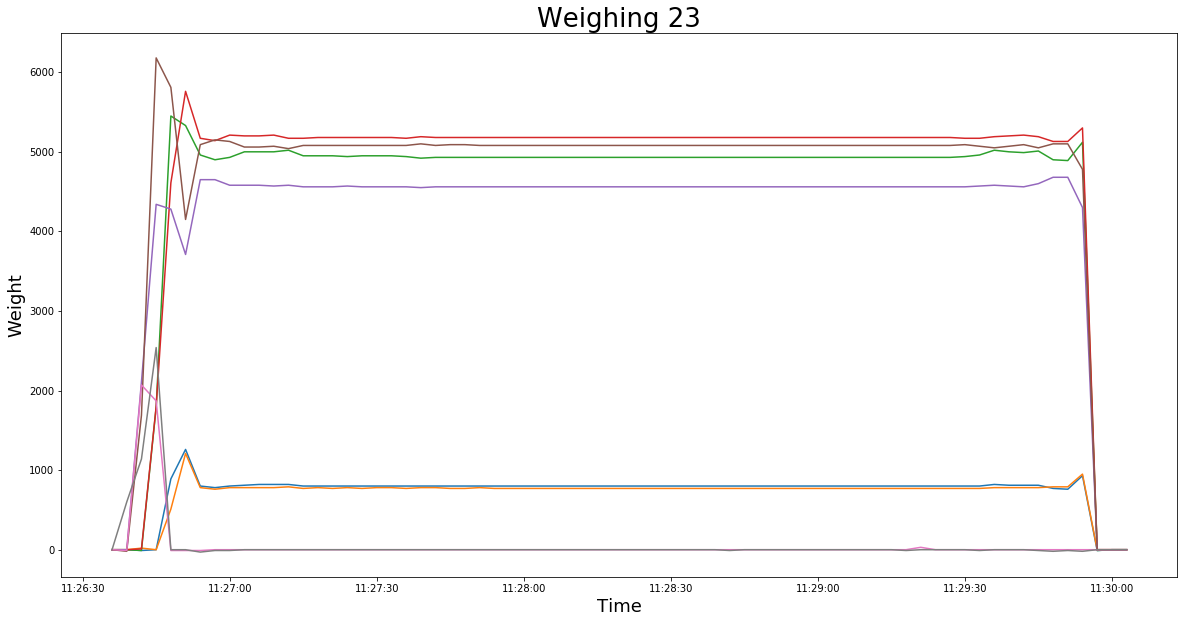

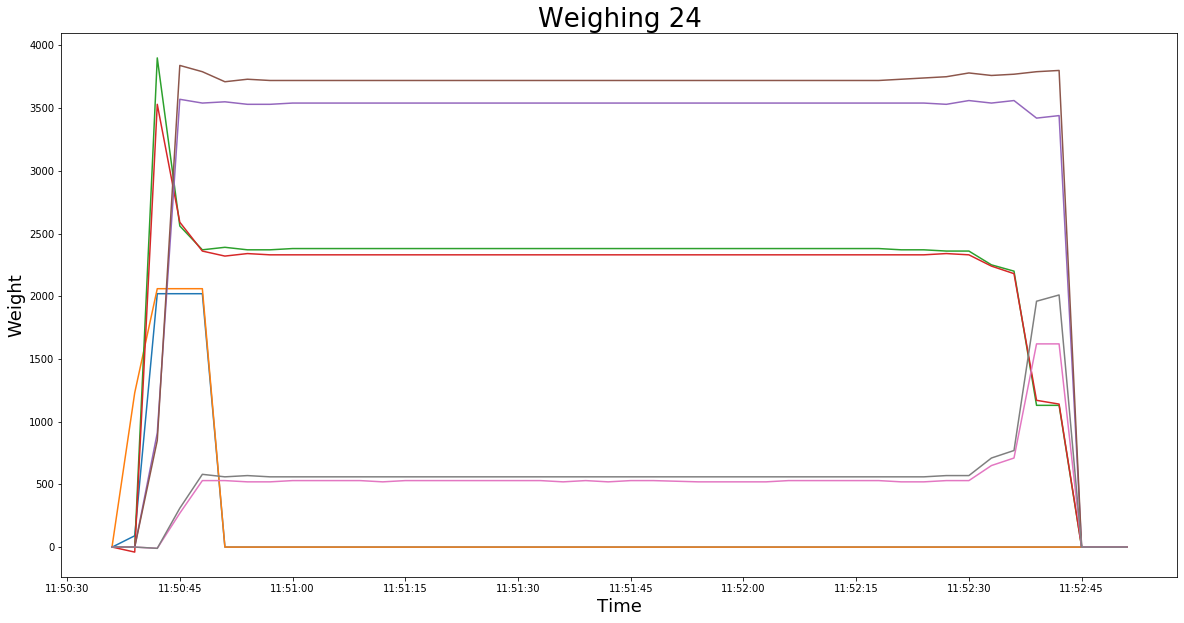

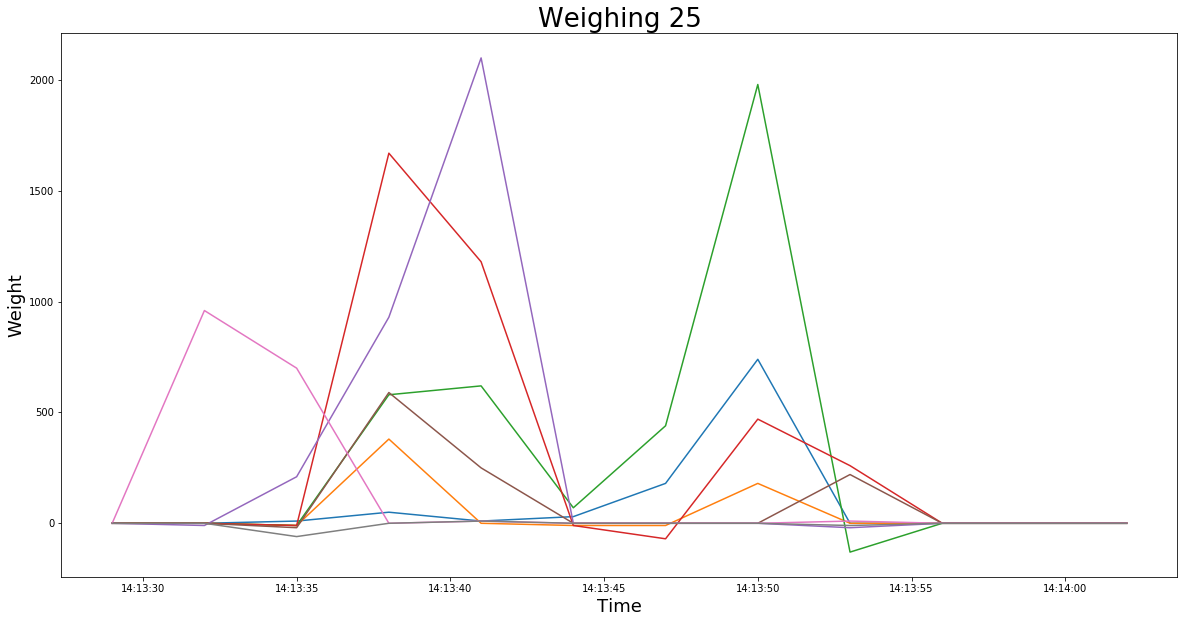

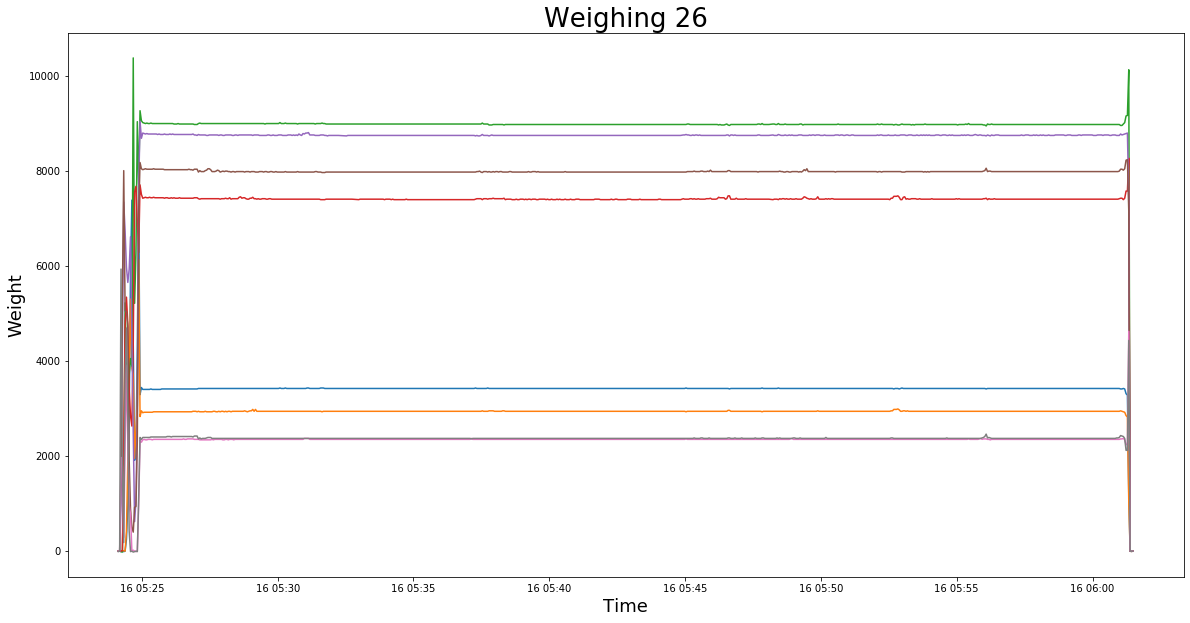

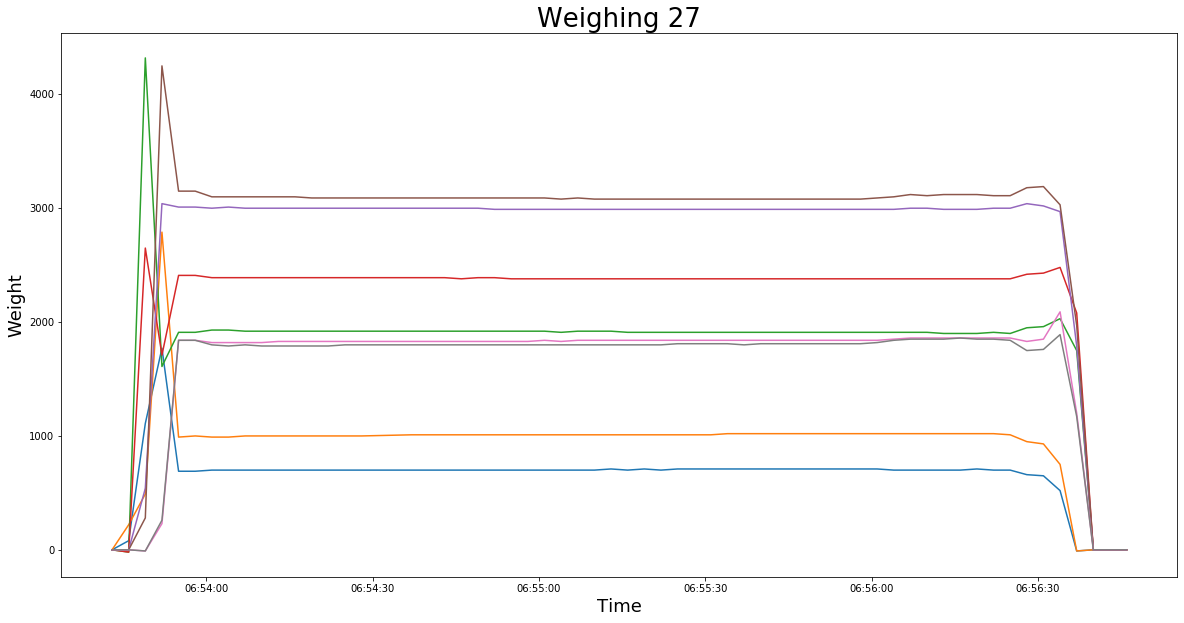

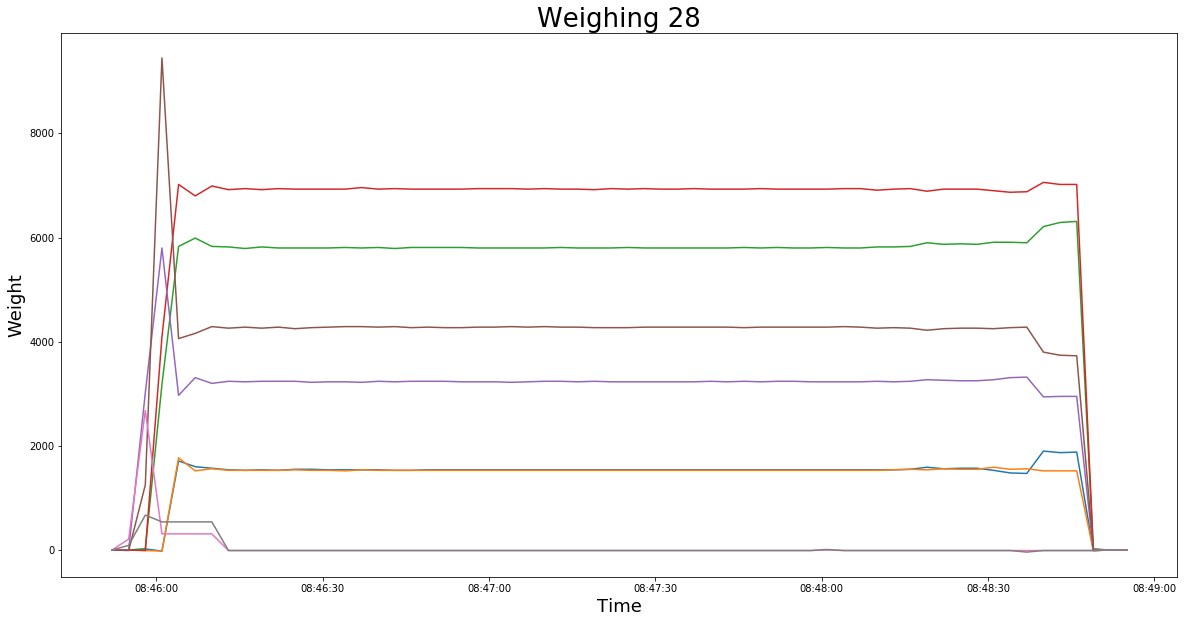

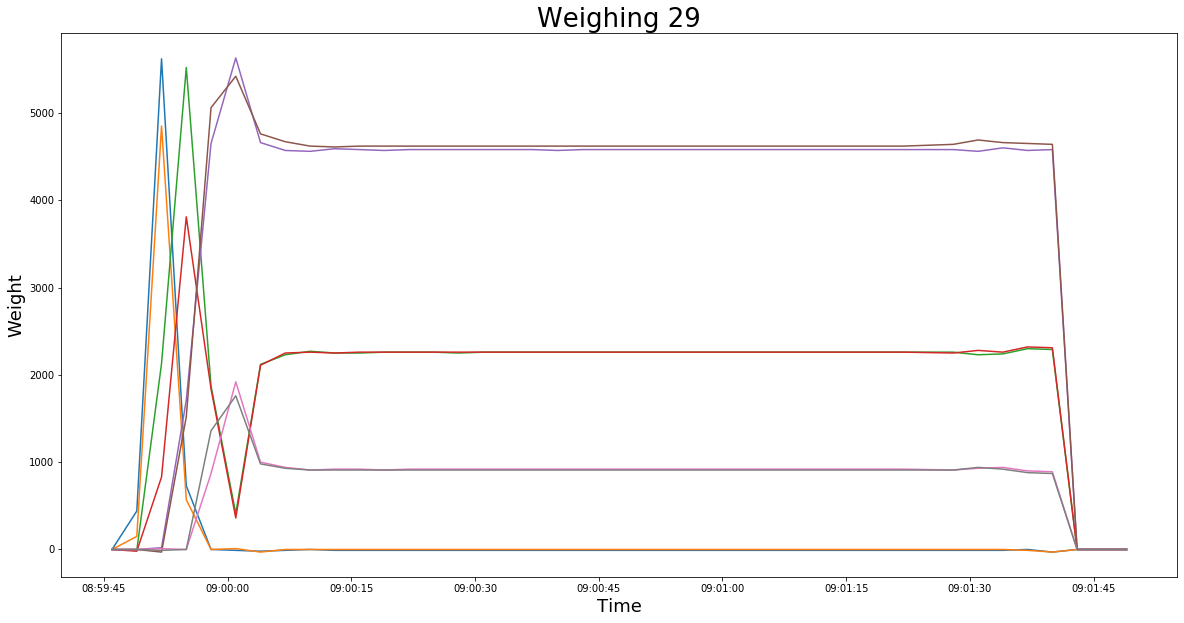

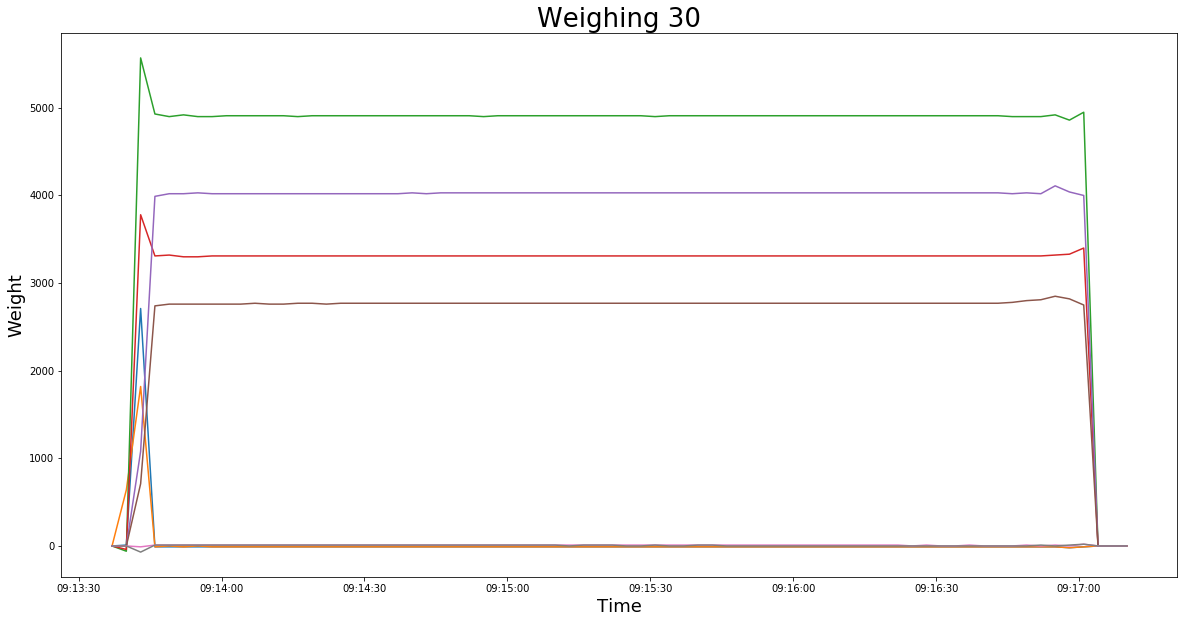

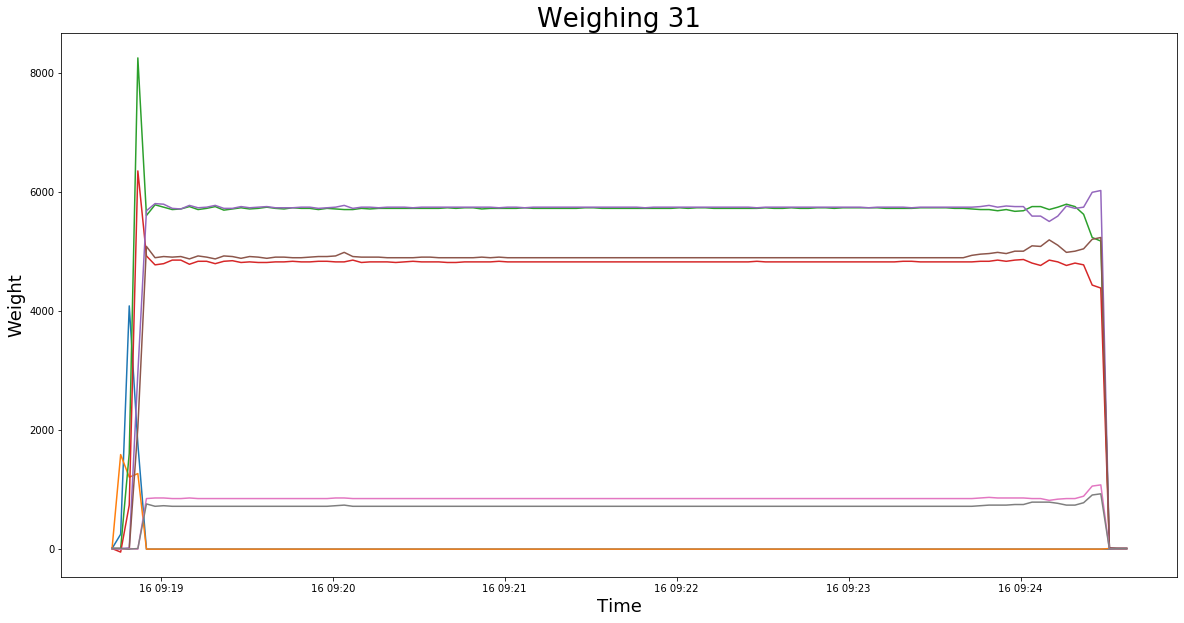

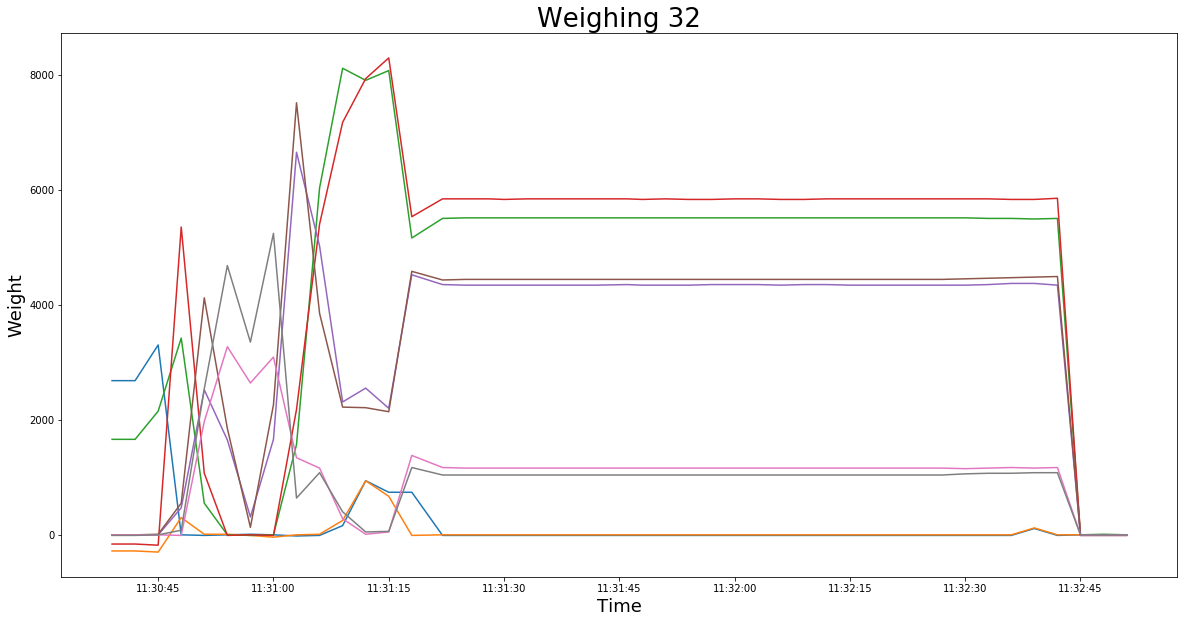

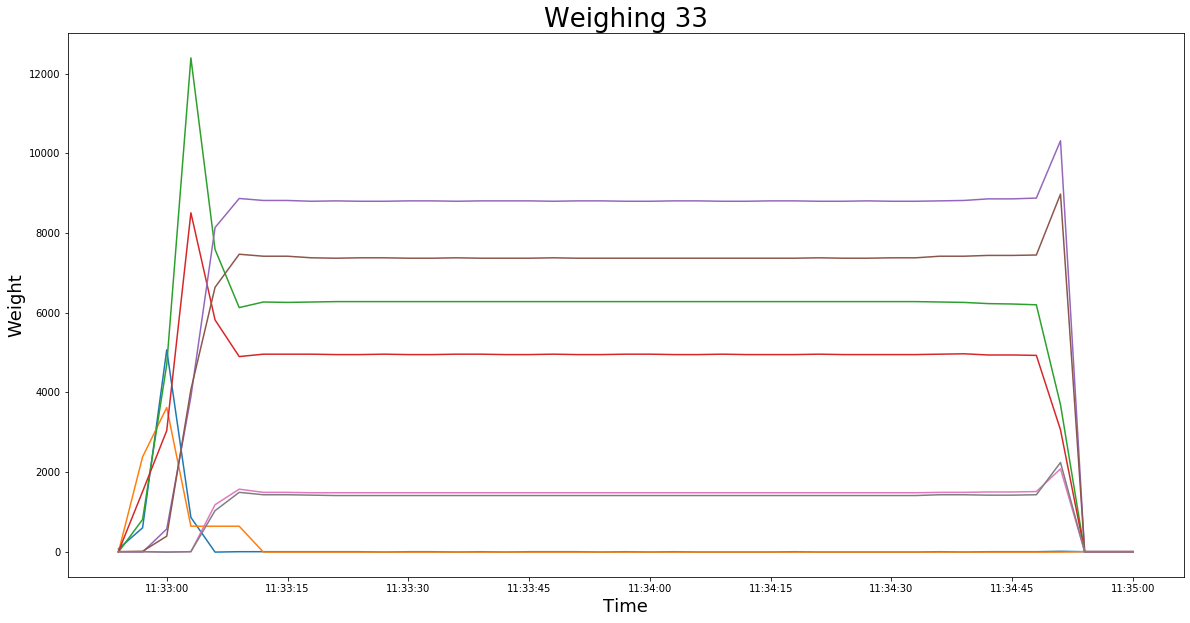

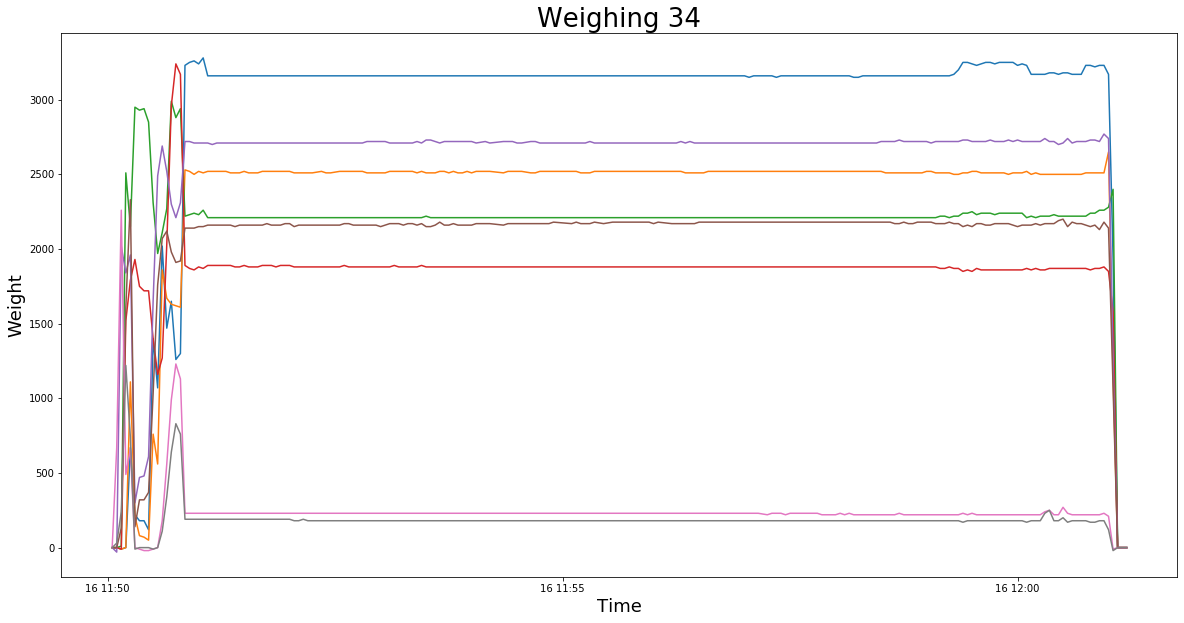

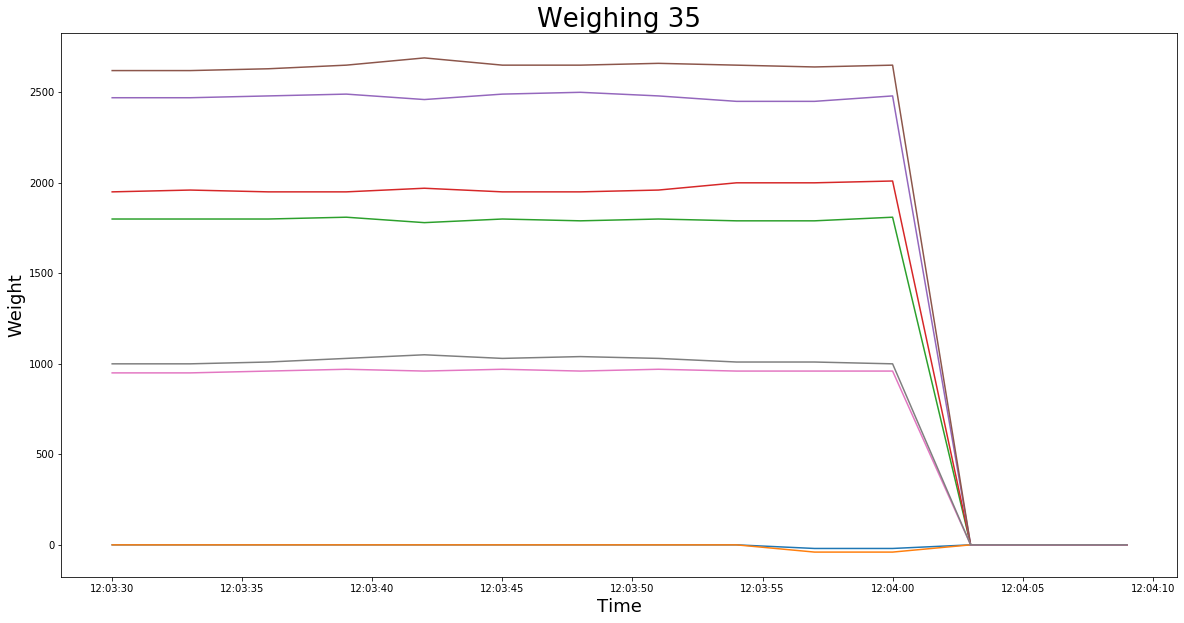

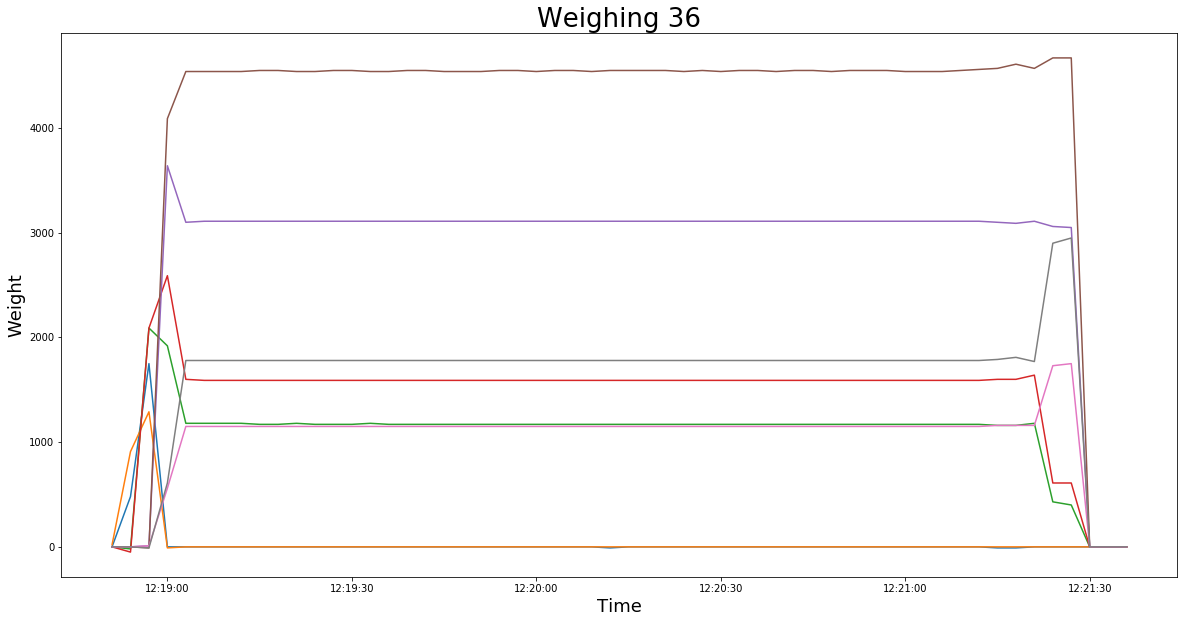

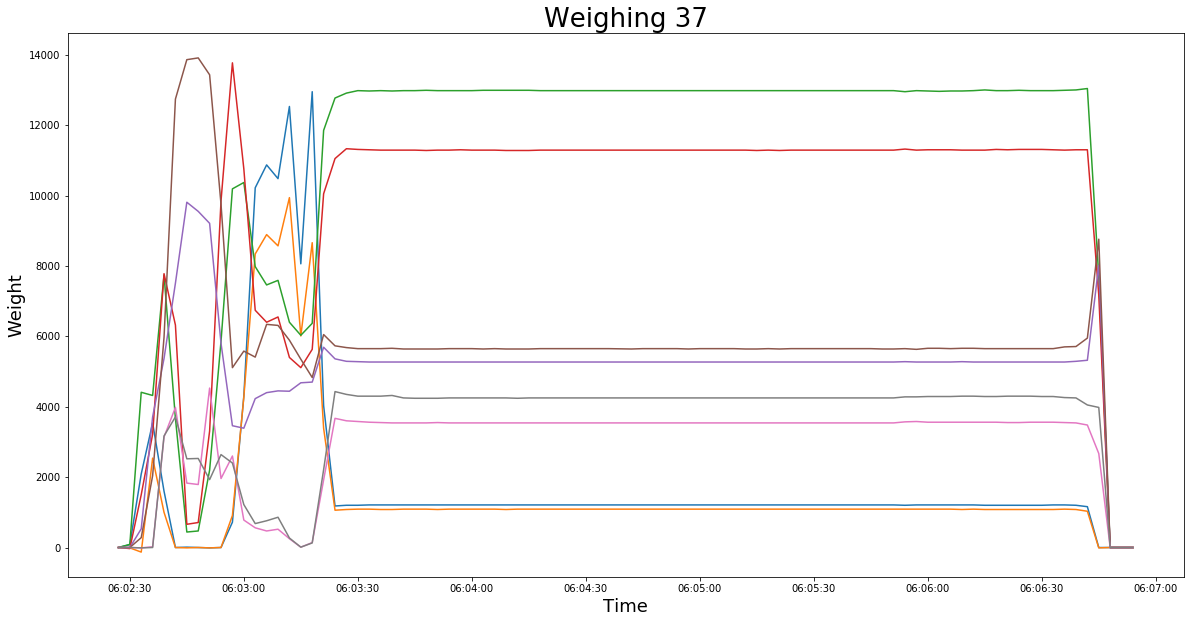

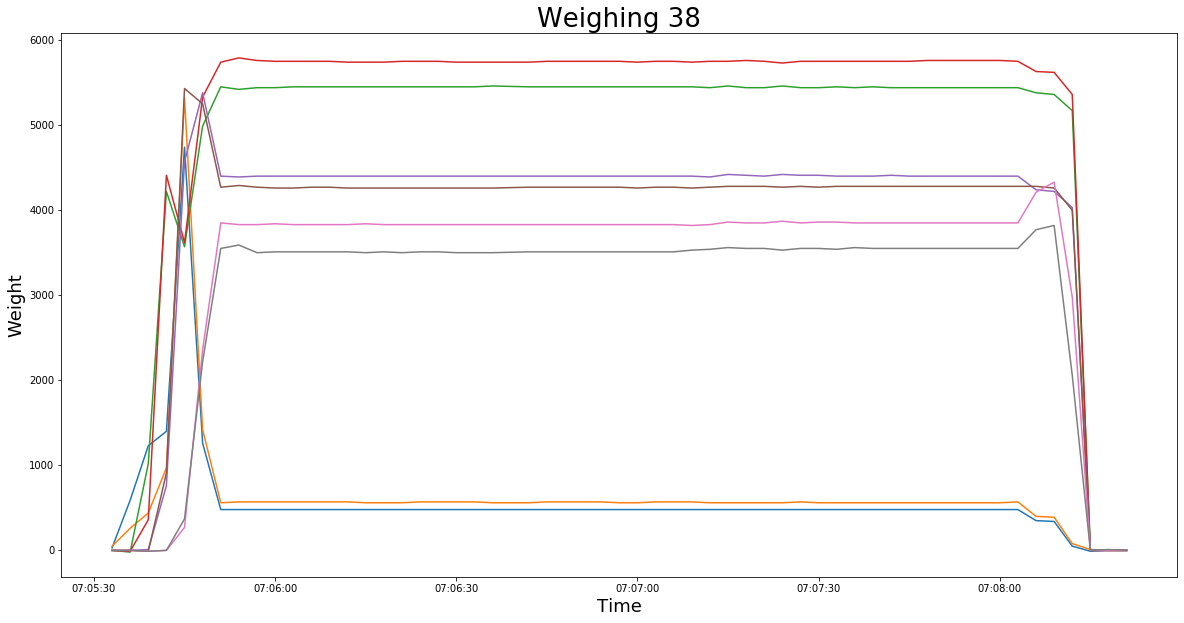

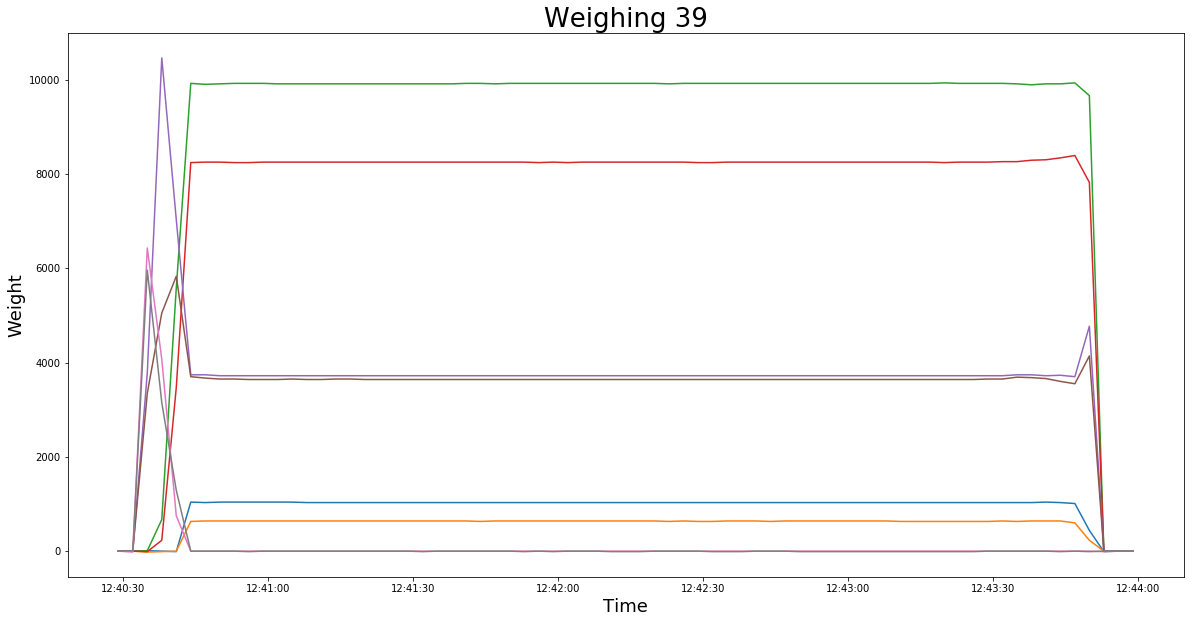

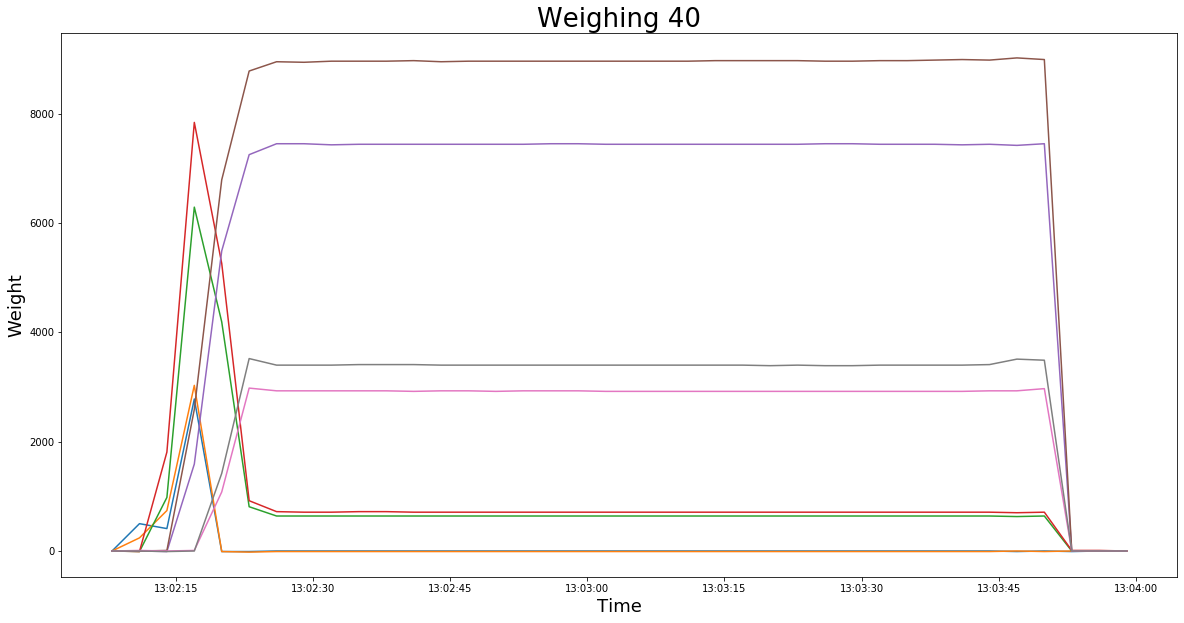

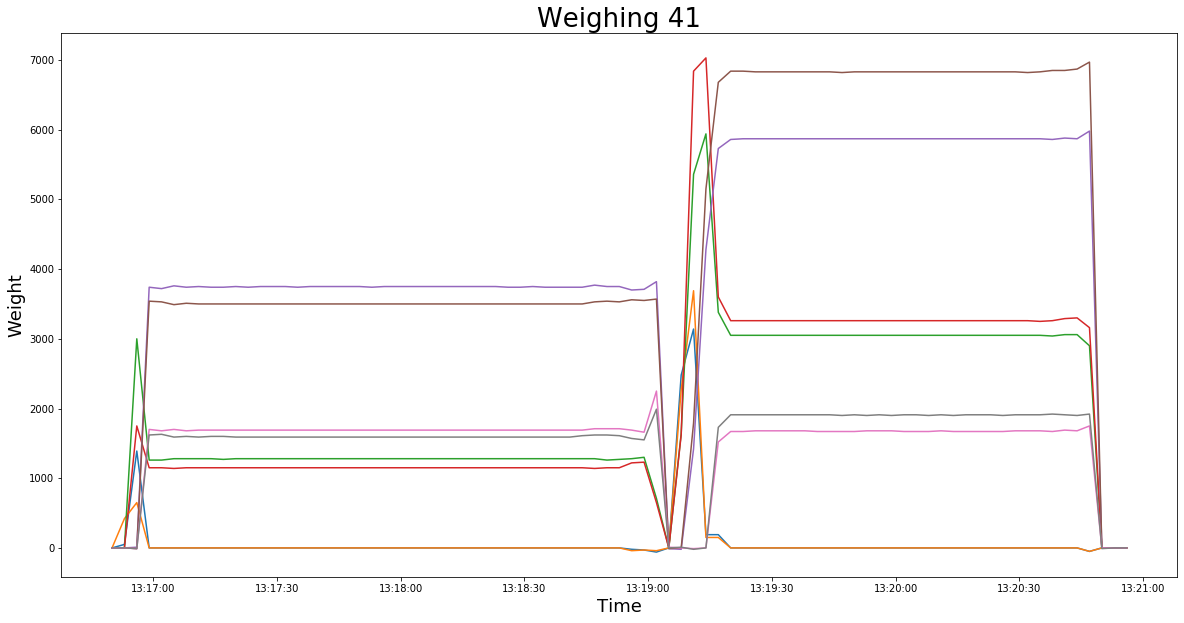

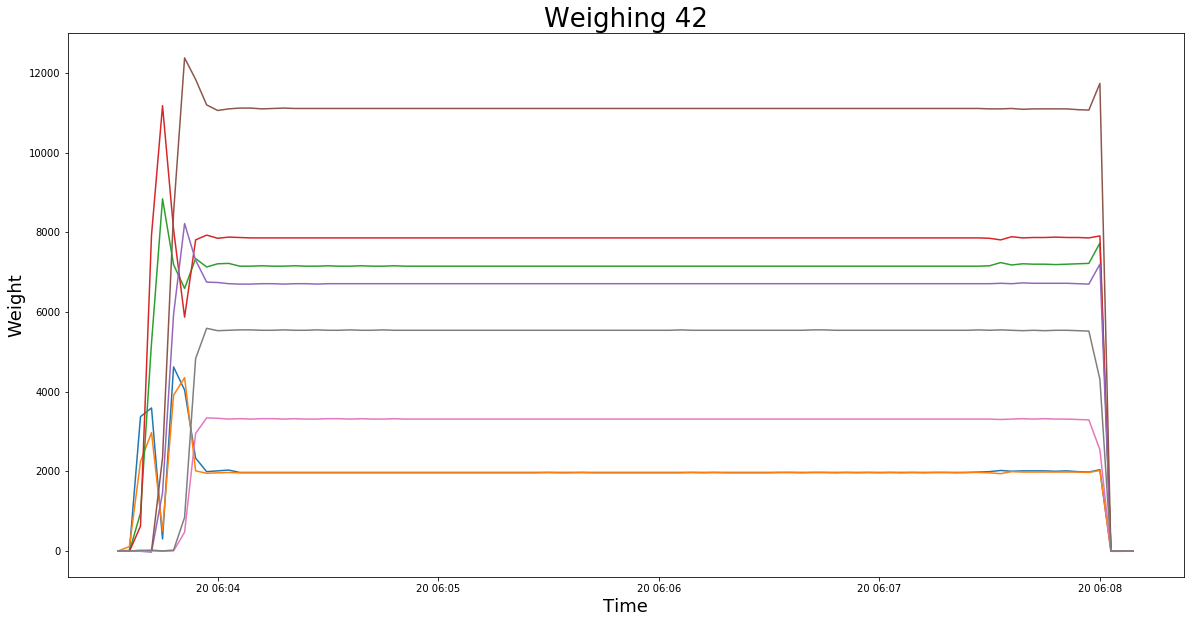

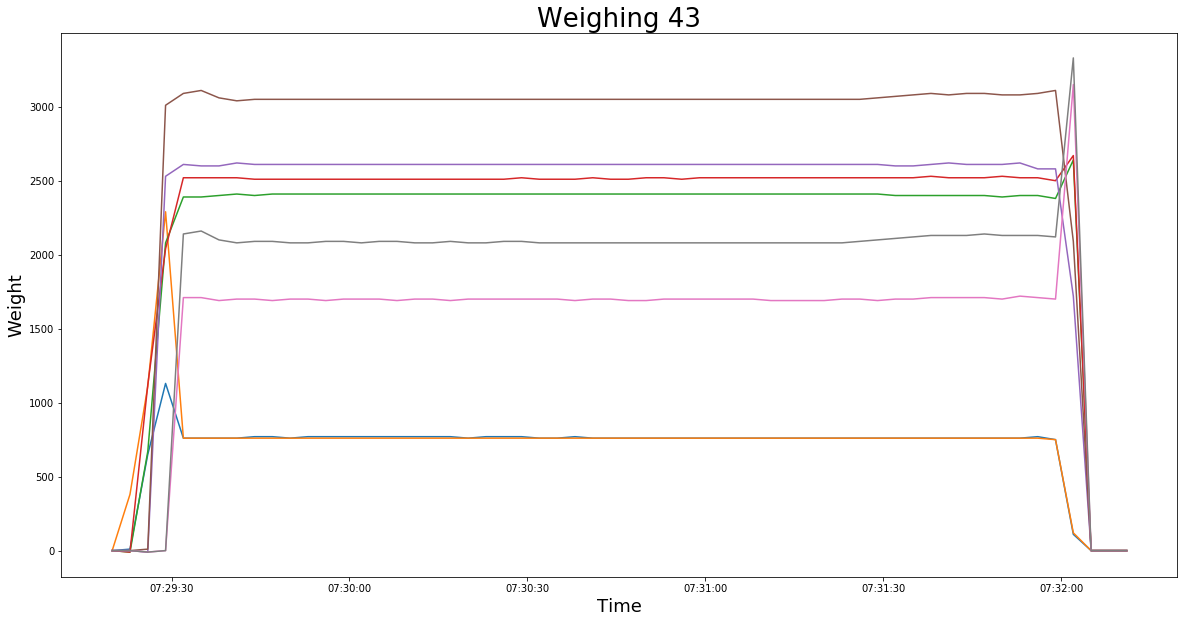

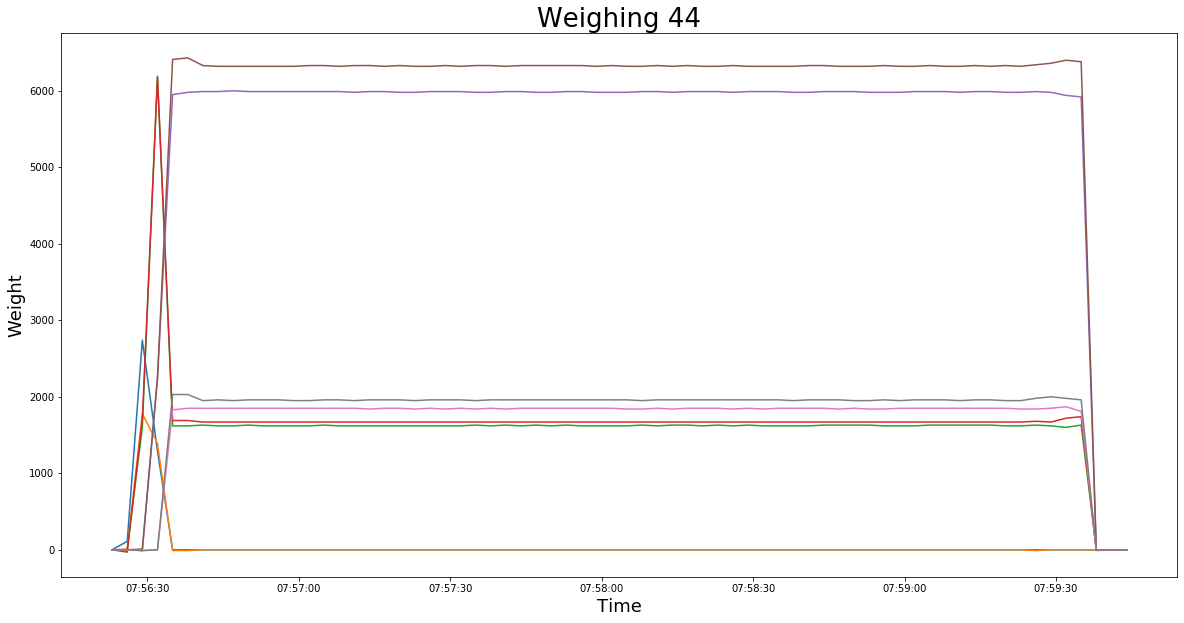

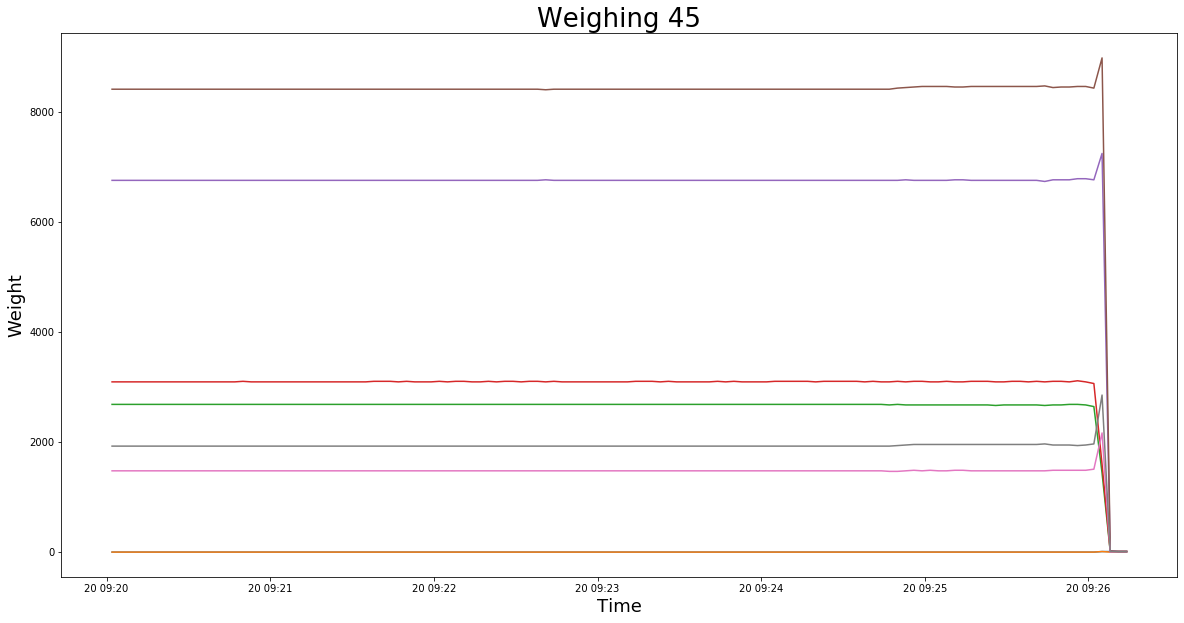

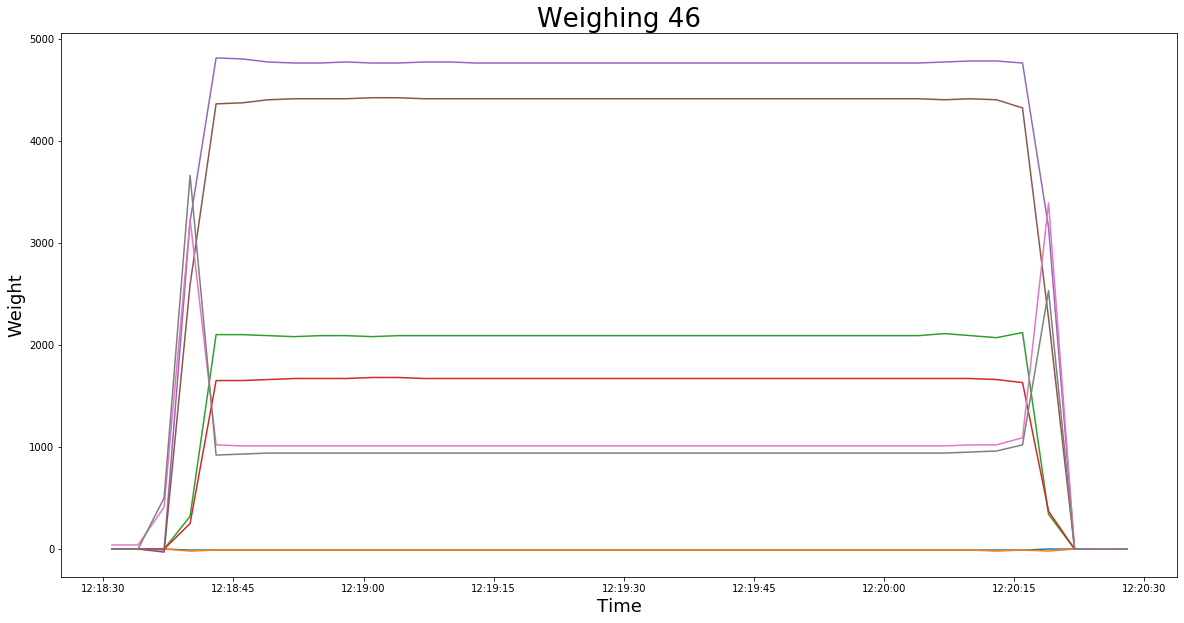

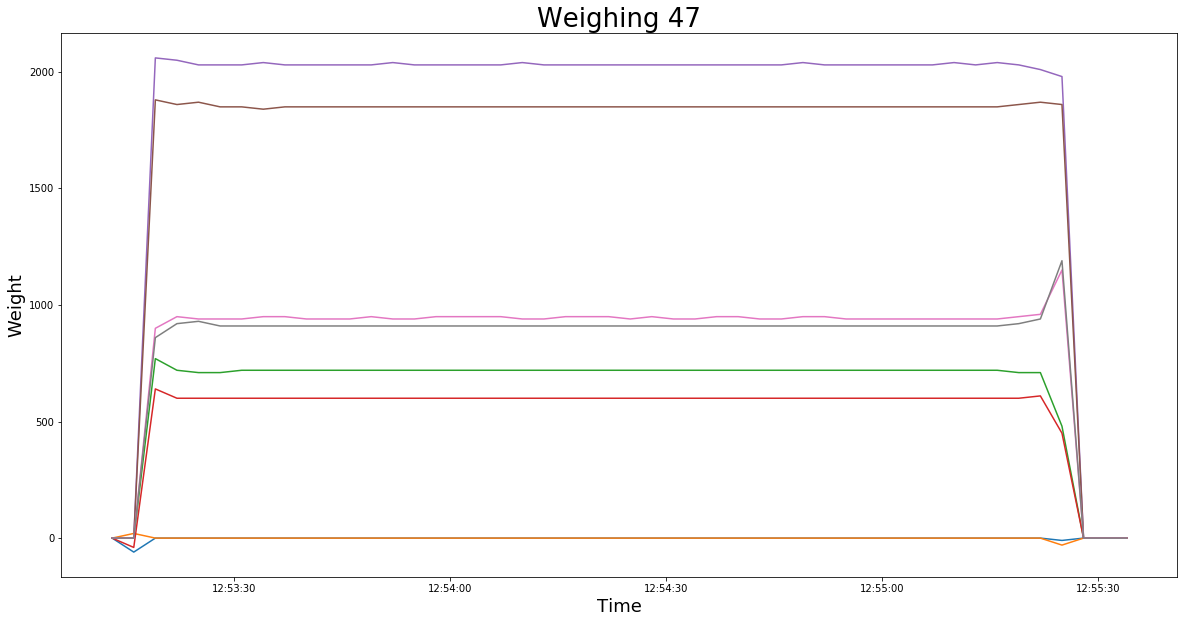

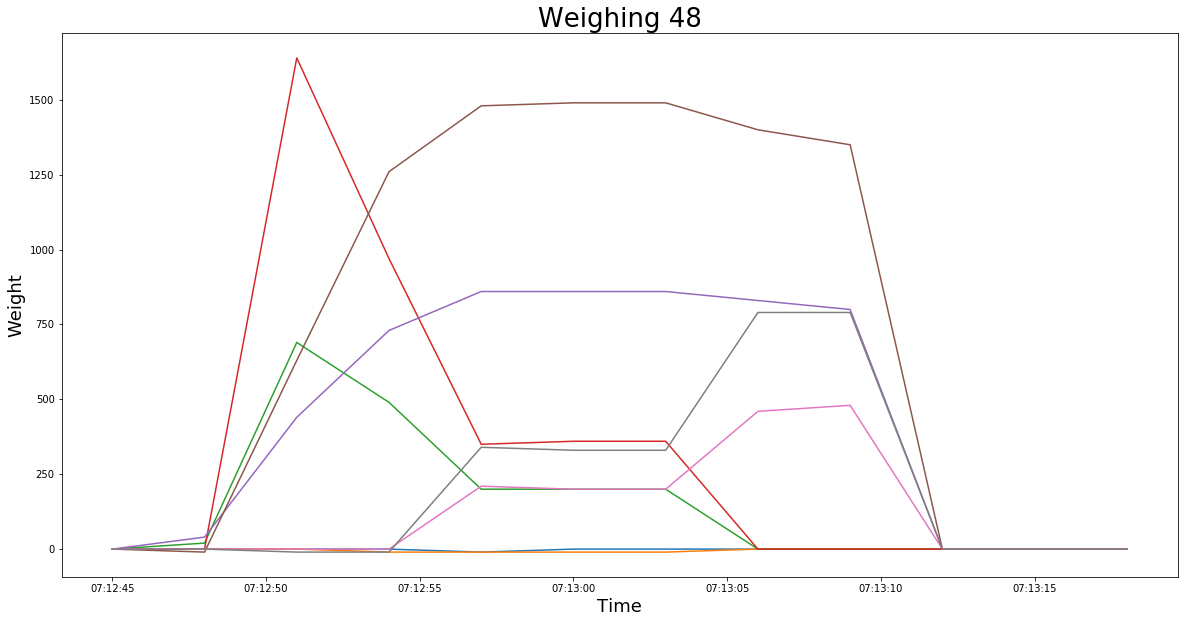

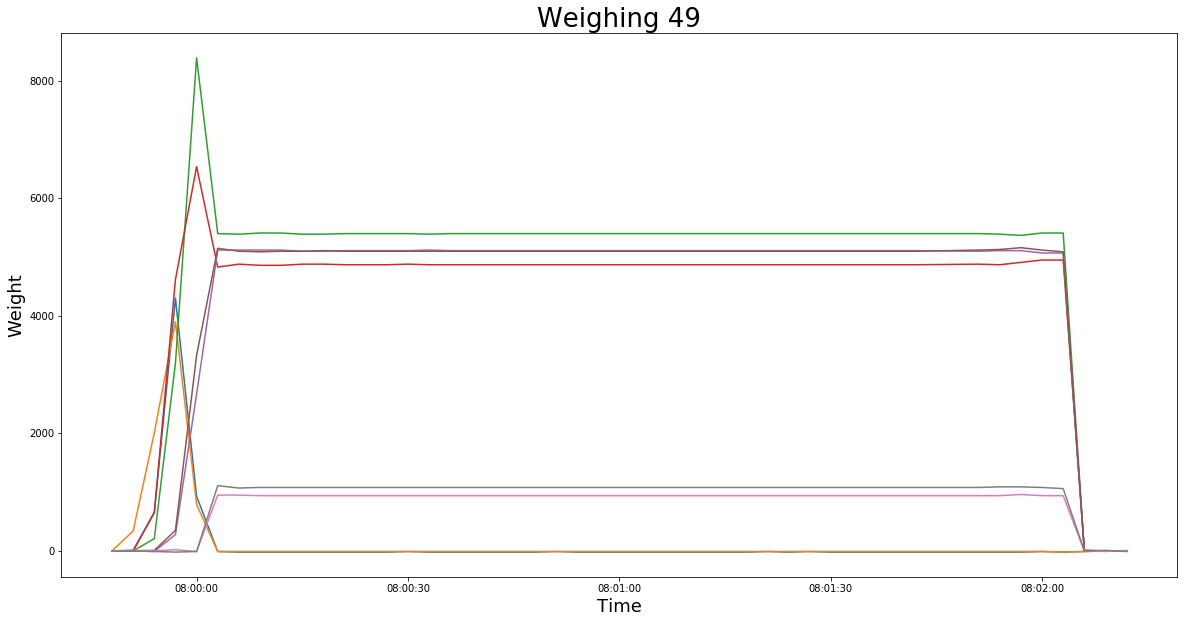

In [88]:
for i in range(50):
    plot_weighing(SegmentedData,i)

In [89]:
SegmentedData.weighing.value_counts().head(60)

2677.0    1884
1372.0    1766
2299.0    1639
2495.0    1411
2781.0    1310
1382.0    1277
2507.0    1206
749.0     1198
444.0     1167
1951.0    1164
1310.0    1113
1757.0    1072
482.0     1047
2248.0    1023
1688.0     962
2119.0     929
2894.0     920
532.0      907
1325.0     884
1447.0     871
1664.0     865
2870.0     836
2161.0     834
1533.0     809
728.0      793
523.0      789
2004.0     778
1717.0     776
2523.0     768
2104.0     758
488.0      742
2352.0     704
2532.0     698
1792.0     697
998.0      687
272.0      687
26.0       660
1246.0     657
1448.0     650
274.0      649
310.0      639
694.0      638
1215.0     626
12.0       616
740.0      613
1255.0     606
1149.0     602
2516.0     602
752.0      569
753.0      560
773.0      541
427.0      540
1949.0     536
1322.0     536
2855.0     523
579.0      522
2772.0     515
947.0      505
1230.0     502
2106.0     497
Name: weighing, dtype: int64